In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
%matplotlib inline

# Mount Google Drive
drive.mount('/content/drive')

# Path menuju ketiga file CSV di Google Drive
data = pd.read_csv('/content/drive/MyDrive/DATASET-SC/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [ ]:
# melihat informasi didalam data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# tampilkan data 5 teratas
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#  menghitung frekuensi kemunculan setiap elemen

from collections import Counter
Counter(data['target'])

Counter({0: 499, 1: 526})

In [ ]:
Counter(data['cp'])

Counter({0: 497, 1: 167, 2: 284, 3: 77})

In [ ]:
# menggunakan metode groupby
data.groupby('cp')['cp'].count()

cp
0    497
1    167
2    284
3     77
Name: cp, dtype: int64

##missing value

In [ ]:
# ---------------MUNCULKAN TABEL/BARIS YANG MEMILIKI MISSING VALUE

data[data.isnull().any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [ ]:
# ----------CEK SECARA LENGKAP APAKAH ADA DATA NULL/KOSONG DI SEMUA KOLOM

# gunakan fungsi .sum() untuk meringkas dan mengetahui jumlahnya

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# -----------KARENA TIDAK ADA DATA YANG KOSONG MAKA KITA TIDAK PERLU
# ------------MELAKUKAN AGREGASI/PENGISIAN PADA DATA

# misalnya data usia kosong,dan ingin mengisi dengan usia rata"
# data['age'].fillna(data['age'].mean().round(0))

In [ ]:
# --------------CEK RATA RATA USIA PENDERITA SAKIT JANTUNG
data['age'].mean()

54.43414634146342

In [ ]:
# --------------CEK DETAK JANTUNG TERTINGGI DARI SEMUA PASIEN
data['thalach'].max()

202

In [ ]:
# -------------# CEK TIPE DATA PADA SETIAP KOLOM (numerik)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# -----------------CEK TIPE DATA STRING

# hasilya tidak ada(kosong) semua data disini berupa angka

kolom_string =data.select_dtypes(include=['object'])

##duplicated value

In [ ]:
# ---------------CEK BARIS DUPLIKAT

# setelah itu akan muncul banyaknya data yang duplikat
data.duplicated().sum()

723

In [ ]:
# ---------------MENGHAPUS DATA DUPLIKAT

data = data.drop_duplicates()
data.shape

(302, 14)

In [ ]:
# ------------------RESET INDEKS

# karena datanya dihapus yang duplikat, otomatis indeknya tidak berurutan maka kita perlu
# untuk mereset agar berurutan

data = data.reset_index(drop=True)
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
301,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#------------CEK INFORMASI DATA LAGI

# dari data sebanyak 1024 tinggal sisa 302 saja karena
# datanya banyak yang duplikat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


##outlier

In [ ]:
data.shape

(302, 14)

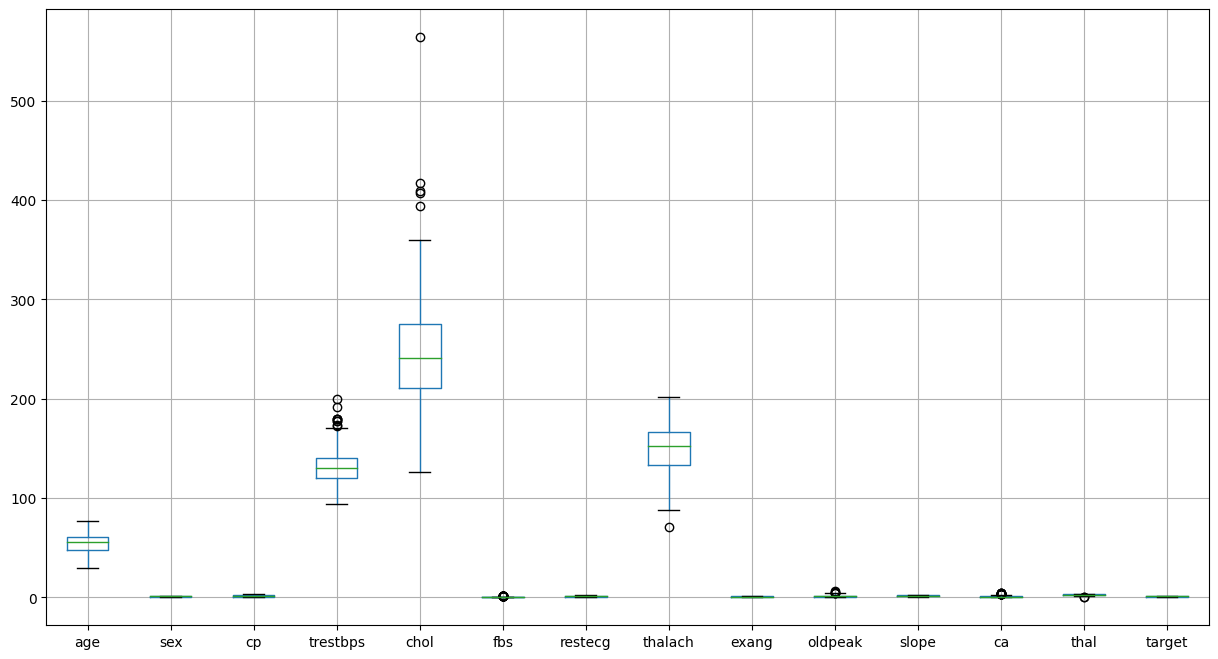

In [ ]:
# --------------CEK OUTLIER

# melihat gambaran secara umum semua data, mana yang mengandung outlier
plt.figure(figsize=(15,8))
data.boxplot()
plt.show()

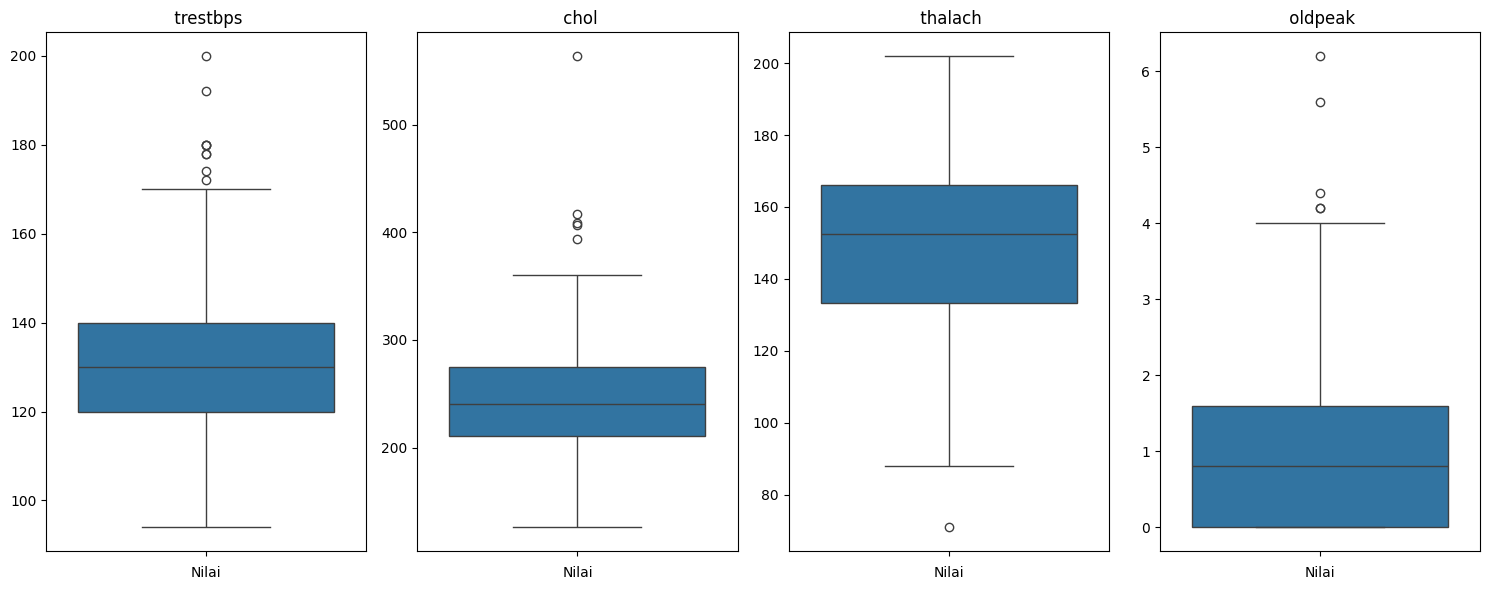

In [ ]:
# DATA YANG HANYA MEMILIKI OUTLIER
kolom_outlier = ['trestbps','chol','thalach','oldpeak']

# VISUALISASI DATA OUTLIER MENGGUNAKAN LOOPING
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_outlier), figsize=(15, 6))

for i, kolom in enumerate(kolom_outlier):
    sns.boxplot(y=data[kolom], ax=axes[i])
    axes[i].set_title(f' {kolom}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# SELEKSI BARIS YANG MENGANDUNG OUTLIER

# memilih baris didalam DataFrame data yang memiliki nilai di luar batas tersebut
# lalu menyimpannya dalam dictionary batas menggunakan loop
batas ={}

for kolom in kolom_outlier:
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    batas[kolom] = (lower_bound, upper_bound)

outliers = {}
for kolom in kolom_outlier:
    lower_bound, upper_bound = batas[kolom]
    outliers[kolom] = data[(data[kolom] < lower_bound) | (data[kolom] > upper_bound)]

In [ ]:
# MENCETAK BATAS ATAS DAN BATAS BAWAH SETIAP KOLOMNYA


for kolom, (lower_bound, upper_bound) in batas.items():
    print(f"Kolom '{kolom}':")
    print(f"  -- Lower Bound: {lower_bound}")
    print(f"  -- Upper Bound: {upper_bound}")
    print()

Kolom 'trestbps':
  -- Lower Bound: 90.0
  -- Upper Bound: 170.0

Kolom 'chol':
  -- Lower Bound: 115.375
  -- Upper Bound: 370.375

Kolom 'thalach':
  -- Lower Bound: 84.125
  -- Upper Bound: 215.125

Kolom 'oldpeak':
  -- Lower Bound: -2.4000000000000004
  -- Upper Bound: 4.0



In [ ]:
# MENCETAK SEMUA DATA OUTLIER

# kolom trestbps
print(f"Outliers pada kolom 'trestbps':")
outliers['trestbps']

Outliers pada kolom 'trestbps':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
44,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
76,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
112,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
124,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
142,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
226,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
248,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [ ]:
# kolom chol
print(f"Outliers pada kolom 'chol':")
outliers['chol']

Outliers pada kolom 'chol':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
128,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
144,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
183,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
260,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [ ]:
# kolom thalach
print(f"Outliers pada kolom 'thalach':")
outliers['thalach']

Outliers pada kolom 'thalach':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
# kolom oldpeak
print(f"Outliers pada kolom 'oldpeak':")
outliers['oldpeak']

Outliers pada kolom 'oldpeak':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
13,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
51,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
63,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
271,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1


In [ ]:
# MENYIMPAN DATA YANG TIDAK MENGANDUNG OUTLIER

# copy datanya dulu
data_tanpa_outlier = data.copy()

# lalu hapus baris yang mengandung outlier menggunakan loop
# berdasarkan batas bawah dan atas

for kolom in kolom_outlier:
    lower_bound, upper_bound = batas[kolom]
    data_tanpa_outlier = data_tanpa_outlier[~((data_tanpa_outlier[kolom] < lower_bound) | (data_tanpa_outlier[kolom] > upper_bound))].reset_index(drop=True)

# Cetak DataFrame baru tanpa outlier
data_tanpa_outlier

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
279,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
280,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
281,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
data_tanpa_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       283 non-null    int64  
 1   sex       283 non-null    int64  
 2   cp        283 non-null    int64  
 3   trestbps  283 non-null    int64  
 4   chol      283 non-null    int64  
 5   fbs       283 non-null    int64  
 6   restecg   283 non-null    int64  
 7   thalach   283 non-null    int64  
 8   exang     283 non-null    int64  
 9   oldpeak   283 non-null    float64
 10  slope     283 non-null    int64  
 11  ca        283 non-null    int64  
 12  thal      283 non-null    int64  
 13  target    283 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.1 KB


In [ ]:
# Menyimpan DataFrame ke file Excel
nama_file = 'dataheart.xlsx'
data_tanpa_outlier.to_excel(nama_file, index=False)  # index=False untuk menghilangkan indeks DataFrame dari output Excel
print("DataFrame telah disimpan dalam format Excel dengan nama:", nama_file)


DataFrame telah disimpan dalam format Excel dengan nama: dataheart.xlsx


##imbalance

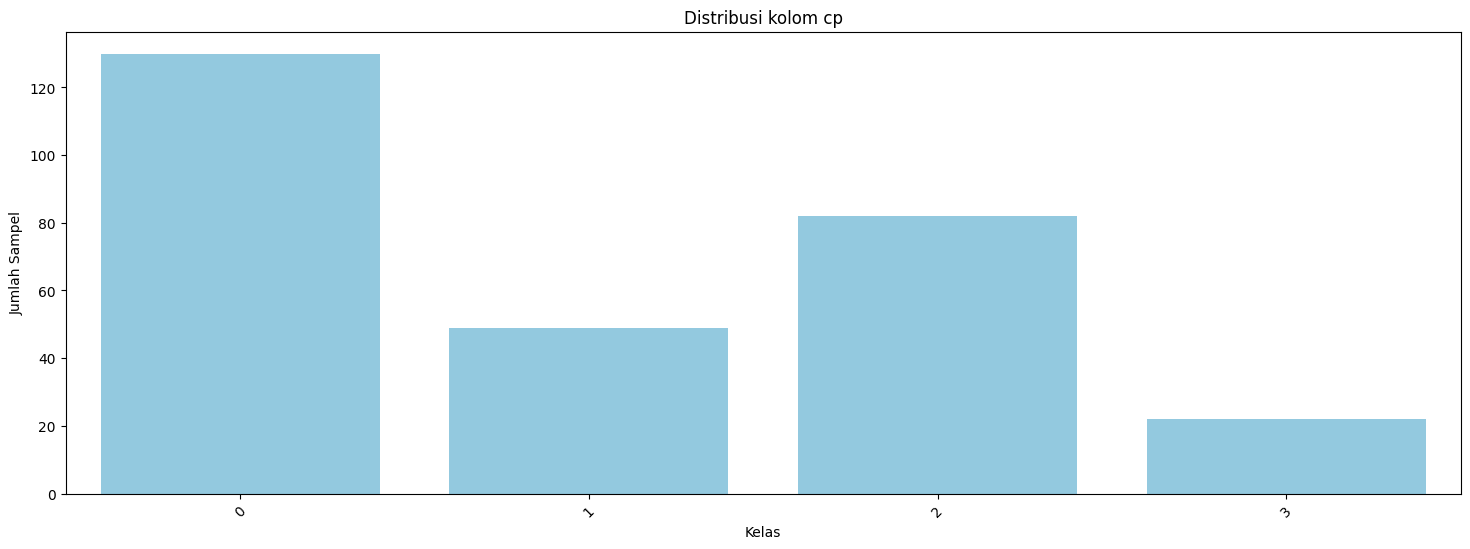

Rasio ketidakseimbangan: 0.16923076923076924


In [ ]:
# -------------------CEK IMBALANCING

# Hitung jumlah sampel dalam setiap kelas
class_counts = data_tanpa_outlier['cp'].value_counts()

# Menampilkan kolom 'cp'/ jenis nyeri dada
plt.figure(figsize=(18, 6))
sns.countplot(x='cp', data=data_tanpa_outlier, color='skyblue')
plt.title('Distribusi kolom cp')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.show()

# Hitung rasio kelas minoritas terhadap kelas mayoritas
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = minority_class_count / majority_class_count
print("Rasio ketidakseimbangan:", imbalance_ratio)

In [ ]:
# hasilnya adalah 0.16 artinya menunjukkan bahwa jumlah sampel dalam kelas minoritas sekitar 16.92% dari jumlah sampel dalam kelas mayoritas

In [ ]:
# copy data dulu
data_encoded = data_tanpa_outlier.copy()

In [ ]:
# menyeimbangkan dataset dengan menggunakan teknik oversampling dengan menggunakan SMOTE

X = data_encoded.drop(columns=['cp'])
y = data_encoded['cp']
oversampler = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['cp'])], axis=1)

In [ ]:
df_resampled.head(5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp
0,52,1,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,0


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       520 non-null    int64  
 1   sex       520 non-null    int64  
 2   trestbps  520 non-null    int64  
 3   chol      520 non-null    int64  
 4   fbs       520 non-null    int64  
 5   restecg   520 non-null    int64  
 6   thalach   520 non-null    int64  
 7   exang     520 non-null    int64  
 8   oldpeak   520 non-null    float64
 9   slope     520 non-null    int64  
 10  ca        520 non-null    int64  
 11  thal      520 non-null    int64  
 12  target    520 non-null    int64  
 13  cp        520 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 57.0 KB


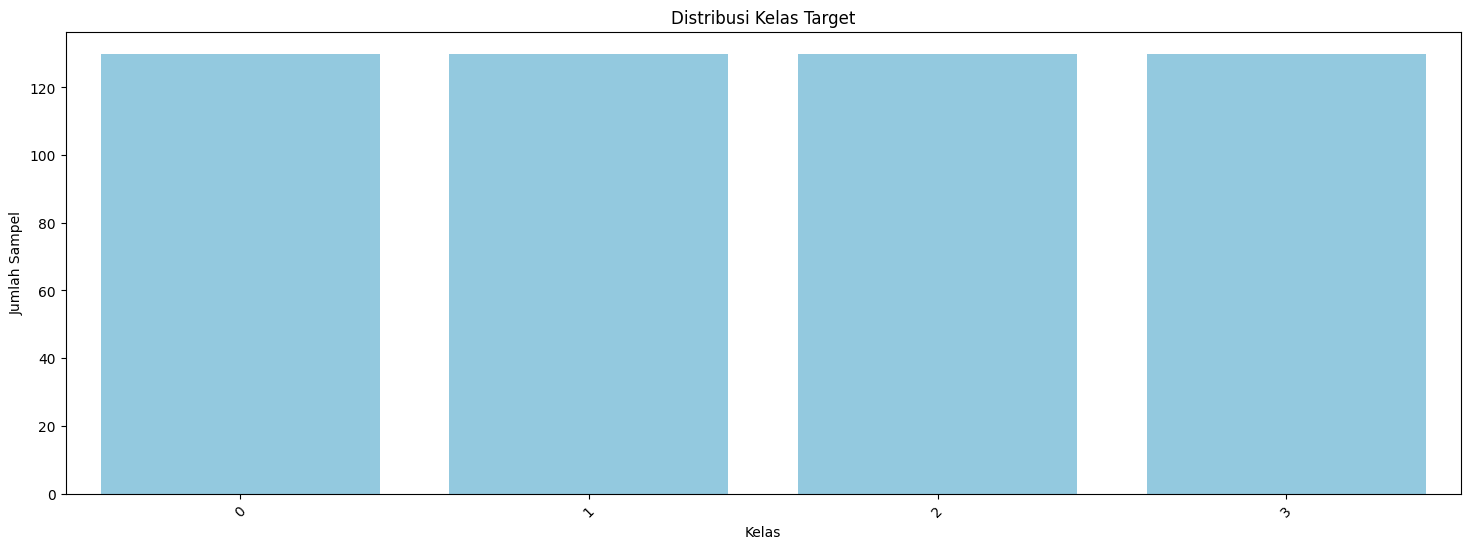

Rasio ketidakseimbangan: 1.0


In [ ]:
# Hitung jumlah sampel dalam setiap kelas
class_counts = df_resampled['cp'].value_counts()

# Menampilkan kolom 'cp'
plt.figure(figsize=(18, 6))
sns.countplot(x='cp', data=df_resampled, color='skyblue')
plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.show()

# Hitung rasio kelas minoritas terhadap kelas mayoritas
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
imbalance_ratio = minority_class_count / majority_class_count
print("Rasio ketidakseimbangan:", imbalance_ratio)

# EDA

##Mengelaborasi features & tipe data

In [ ]:
# ------------------MEMISAHKAN FITUR BERDASARKAN TIPE DATA

# nominal dan numerik
# tidak ada data ordinal karena didalam dataset datanya berupa numerik semua

# Memisahkan fitur berdasarkan tipe data
fitur_nominal = data_tanpa_outlier.select_dtypes(include=['object']).columns.tolist()
fitur_numerik = data_tanpa_outlier.select_dtypes(include=['int', 'float']).columns.tolist()

print("Fitur Nominal:", fitur_nominal)
print("Fitur Numerik:", fitur_numerik)

Fitur Nominal: []
Fitur Numerik: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


##mean modus median

In [ ]:
#------------------------ MENYIMPAN KOLOM YANG AKAN DITAMPILKAN KEDALAM VARIABEL & DI AGREGASI
kolom_agregasi =['age','thalach','oldpeak','trestbps','chol']

In [ ]:
# ----------------------- MEAN MODUS MEDIAN

df_resampled[kolom_agregasi].agg(['mean', 'median', lambda x: x.mode().iloc[0]])

,age,thalach,oldpeak,trestbps,chol
mean,53.948077,153.675,0.917866,131.701923,241.567308
median,55.000000,159.000,0.632618,130.000000,236.000000
<lambda>,58.000000,162.000,0.000000,120.000000,233.000000


In [ ]:
# ----------------------MENAMPILKAN BATAS ATAS DAN BATAS BAWAH

df_resampled[kolom_agregasi].describe().loc[['min', '25%', '50%', '75%', 'max']]

,age,thalach,oldpeak,trestbps,chol
min,29.0,88.0,0.000000,94.0,126.00
25%,47.0,141.0,0.000000,120.0,211.00
50%,55.0,159.0,0.632618,130.0,236.00
75%,60.0,169.0,1.517233,141.0,268.25
max,77.0,202.0,4.000000,170.0,360.00


##deskripsi statistik

<ipython-input-42-118df68b463e>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


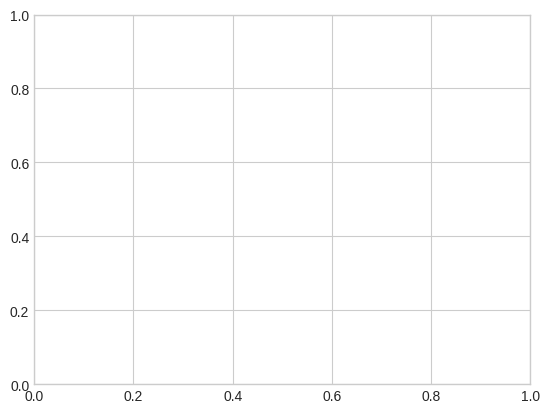

In [ ]:
# MEMBUAT FIGURE DAN AXIS


plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()

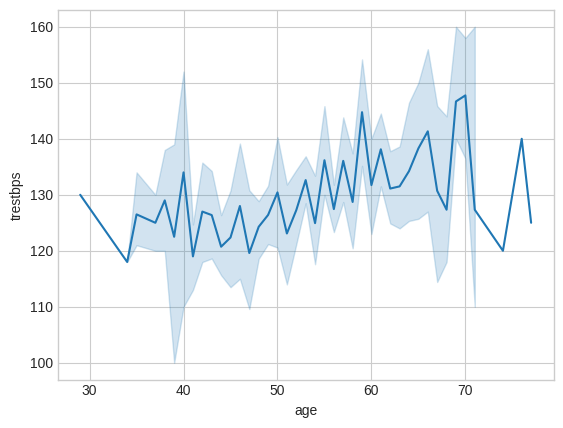

In [ ]:
# MELIHAT DETAK JANTUNG BERDASARKAN USIA

# Dengan menggunakan line plot, kita dapat melihat pola atau tren dari tekanan darah dalam (trestbps)
# seiring dengan bertambahnya usia (age).
# jadi semakin usia seorang bertambah maka tekanan darah juga akan semakin tinggi

ax = sns.lineplot(x='age',y='trestbps', data = data_tanpa_outlier)

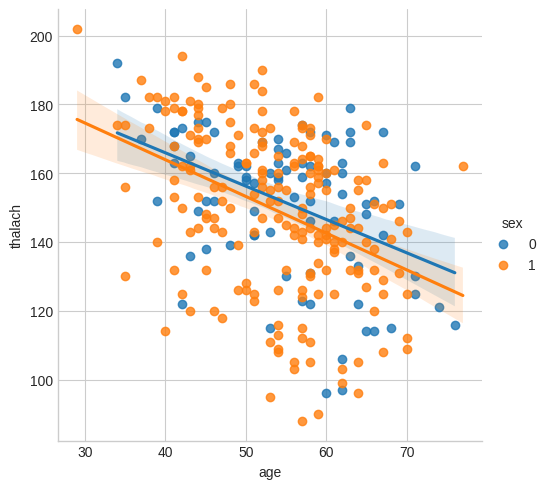

In [ ]:
# Pada gambar dibawah, kita bisa melihat pola hubungan antara usia dan detak jantung maksimum
# dan titik titik itu akan dipisahkan warnanya bedasarkan jenis kelamin
# serta garis regresi linier yang menunjukkan tren umum dari hubungan tersebut.

# Dengan memisahkan plot antara pria dan wanita, serta memperhatikan garis regresi linier yang dihasilkan,
# kita bisa melihat apakah pengaruh usia terhadap detak jantung maksimum berbeda antara kedua jenis kelamin.

g = sns.lmplot(x="age", y="thalach", hue="sex", data=data_tanpa_outlier)

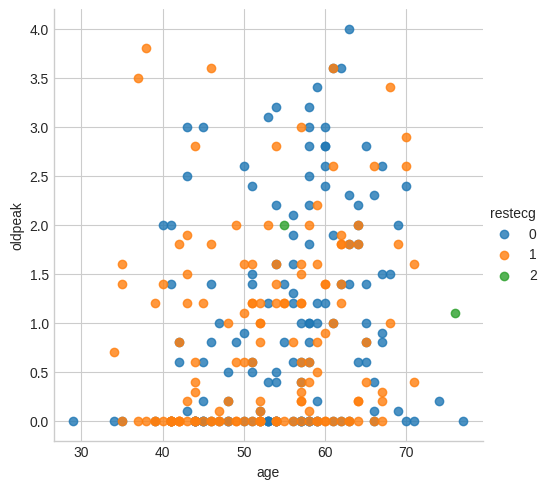

In [ ]:
# Pada gambar dibawah dapat melihat apakah terdapat hubungan antara usia dan tingkat depresi ST(oldpeak).
# Jika titik-titik cenderung naik atau turun secara beraturan seiring bertambahnya usia,
# ini menunjukkan adanya hubungan antara usia dan tingkat depresi ST.
# serta pada gambar dibawah hasilnya dipisahkan berdasarkan kategori di restecg

ax = sns.lmplot(x="age", y="oldpeak", data=data_tanpa_outlier, fit_reg=False,  hue='restecg')

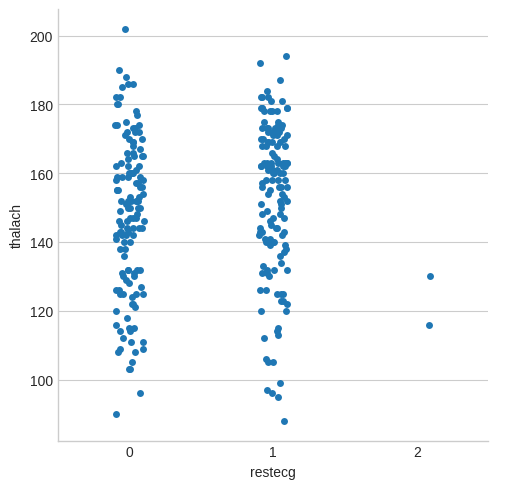

In [ ]:
# Pada gambar dibawah, menggunakan catplot kita bisa melihat gambaran tentang distribusi detak jantung
# dalam setiap hasil dari erstecg
# misalnya pada hasil restecg 1 sebaran thalac banyak berada di range 160-180

ax = sns.catplot(x="restecg", y="thalach", data=data_tanpa_outlier)

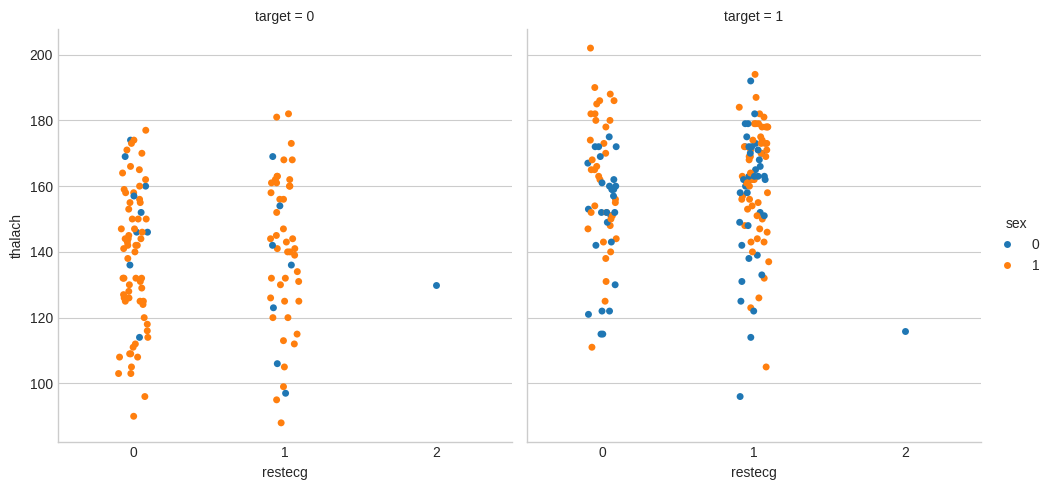

In [ ]:
# gambaran dibawah ini sama dengan diatas tapi yang berbeda adalah
# Dengan membagi data berdasarkan jenis kelamin, kita juga dapat melihat apakah pola hubungan antara hasil restecg  dan detak jantung maksimum berbeda antara pria dan wanita.

g = sns.catplot(x="restecg", y="thalach", hue="sex", col='target', data=data_tanpa_outlier)

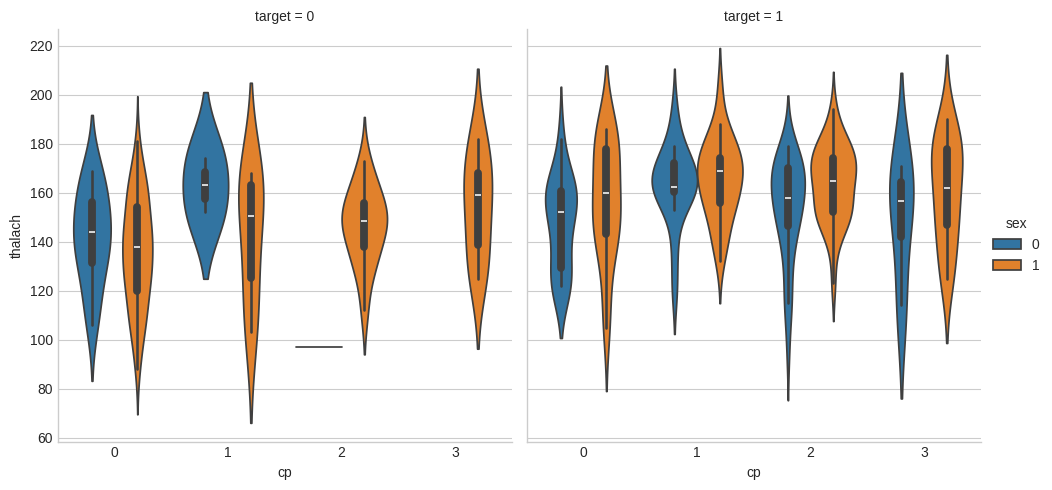

In [ ]:
# kode ini menampilkan distribusi data variabel "thalach" (detak jantung maksimum yang dicapai)
# untuk setiap kategori "cp" (jenis nyeri dada) , dengan pemisahan berdasarkan jenis kelamin menggunakan warna,
# dan masing-masing plot dalam kolom berdasarkan variabel "target".

# misalnya = pada target 0 di  jenis cp(nyeri dada) kategori 1 distribusi wanita banyak berada di 140-180
# serta pada cp kategori 2 dan 4 semuanya adalah laki laki

g = sns.catplot(x="cp", y="thalach", hue="sex", col='target', kind='violin', data=data_tanpa_outlier)

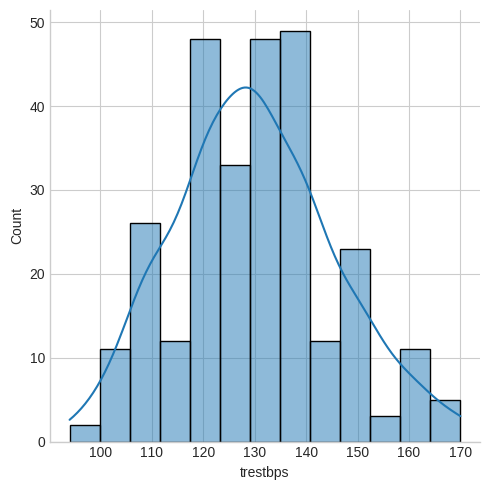

In [ ]:
# Pada gambar dibawah, bisa dilihat sumbu x adalah trest bps dan y adalah count, ini digunakan untuk menghitung jumlah
# pasien berdasarkan hasil trestbps-nya

# misal trestbps 120,130,140 adalah hasil yang paling banyak/tinggi

g = sns.displot(data_tanpa_outlier.trestbps, kde=True)

In [ ]:
# g = sns.pairplot(data_tanpa_outlier, hue="target")

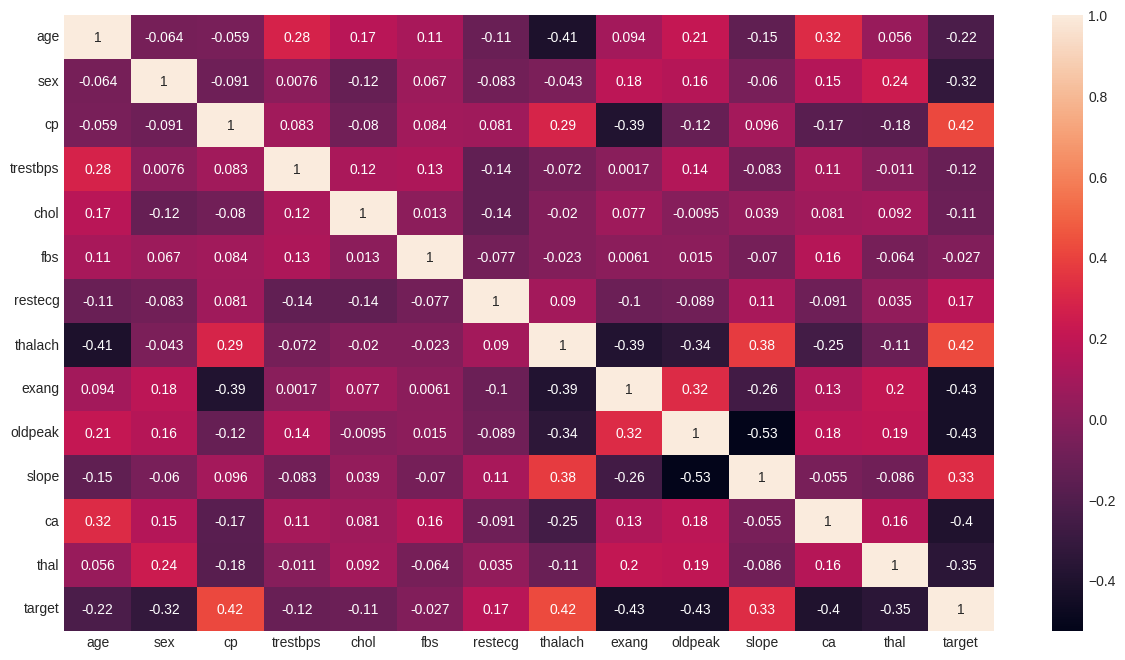

In [ ]:
plt.figure(figsize=(15, 8))

# Membuat heatmap dengan seaborn
sns.heatmap(data_tanpa_outlier.corr(), annot=True)

# Menampilkan heatmap
plt.show()


# gambar dibawah untuk membuat sebuah heatmap menggunakan seaborn untuk menampilkan korelasi antar variabel dalam dataset data_tanpa_outlier.
# Jika warna di heatmap mendekati warna terang atau putih (angka 1), itu menunjukkan korelasi yang kuat antara kedua variabel. dan begitupun sebaliknya
# dilihat di gambar warna yang mendekati putih atau angka 1 yaitu antara cp dengan target
# lalu ada thalac dengan targrt ysng korelasinya paling kuat

#Feature Enginering

In [ ]:
# 1 . ------------------------------------------MENAMBAHKAN KOLOM KATEGORI USIA

batas_usia = [0, 30, 50, 100]
label_usia = ['Dewasa Muda', 'Dewasa Tengah', 'Lansia']

# Inisialisasi kolom kategori usia
data_tanpa_outlier['Usia_Kategori'] = None

# Looping untuk menambahkan kategori usia
for i in range(len(batas_usia) - 1):
    batas_bawah = batas_usia[i]
    batas_atas = batas_usia[i + 1]
    label = label_usia[i]

 # Mengkondisikan dan menambahkan kategori usia
    data_tanpa_outlier.loc[(data_tanpa_outlier['age'] > batas_bawah) & (data_tanpa_outlier['age'] <= batas_atas), 'Usia_Kategori'] = label

# Mengkondisikan dan menambahkan kategori usia untuk kategori Lansia
data_tanpa_outlier.loc[data_tanpa_outlier['age'] > batas_usia[-1], 'Usia_Kategori'] = label_usia[-1]
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Usia_Kategori
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Lansia
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Lansia
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lansia


In [ ]:
#2. --------------------------------------------RASIO KOLESTEROL TERHADAP TEKANAN DARAH

data_tanpa_outlier['Rasio_Kolesterol_Tekanan_Darah'] = data_tanpa_outlier['chol'] / data_tanpa_outlier['trestbps']
data_tanpa_outlier.head(3)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Lansia,1.696
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Lansia,1.450
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lansia,1.200


In [ ]:
# # 3. ------------------------------------------FREKUENSI DENYUT JANTUNG TERHADAP USIA

data_tanpa_outlier['Freq_Denyut_Jantung/Usia'] = data_tanpa_outlier['thalach'] / data_tanpa_outlier['age']
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Lansia,1.696,3.230769
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Lansia,1.450,2.924528
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lansia,1.200,1.785714


In [ ]:
# 4. -----------------------------------------------RASIO OLDPEAK TERHADAP THALACH

data_tanpa_outlier['Rasio_Oldpeak/Thalach'] = data_tanpa_outlier['oldpeak'] / data_tanpa_outlier['thalach']
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Lansia,1.696,3.230769,0.005952
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Lansia,1.450,2.924528,0.020000
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lansia,1.200,1.785714,0.020800


In [ ]:
# 5.----------------------------------------------------- USIA BERESIKO TINGGI

data_tanpa_outlier['Usia_Berisiko_Tinggi'] = 'Tidak'  # Asumsikan awalnya tidak berisiko tinggi

# Mengkondisikan dan menambahkan label Usia Berisiko Tinggi
data_tanpa_outlier.loc[data_tanpa_outlier['age'] >= 54, 'Usia_Berisiko_Tinggi'] = 'Ya'
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Lansia,1.696,3.230769,0.005952,Tidak
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Lansia,1.450,2.924528,0.020000,Tidak
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lansia,1.200,1.785714,0.020800,Ya


In [ ]:
# 6. -------------------------------------------------------MENENTUKAN BATAS KATEGORI DENYUT JANTUNG
# barikardia = rendah
# takikardia = tinggi

batas_denyut = [0, 60, 100, float('inf')]
label_denyut = ['Bradikardia', 'Normal', 'Takikardia']

# Inisialisasi kolom kategori denyut jantung
data_tanpa_outlier['Kategori_Denyut_Jantung'] = None

# Looping untuk menambahkan kategori denyut jantung
for i in range(len(batas_denyut) - 1):
    batas_bawah = batas_denyut[i]
    batas_atas = batas_denyut[i + 1]
    label = label_denyut[i]

    # Mengkondisikan dan menambahkan kategori denyut jantung
    data_tanpa_outlier.loc[(data_tanpa_outlier['thalach'] > batas_bawah) & (data_tanpa_outlier['thalach'] <= batas_atas), 'Kategori_Denyut_Jantung'] = label

# Menampilkan dataset dengan kolom kategori denyut jantung
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Lansia,1.696,3.230769,0.005952,Tidak,Takikardia
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Lansia,1.450,2.924528,0.020000,Tidak,Takikardia
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Lansia,1.200,1.785714,0.020800,Ya,Takikardia


In [ ]:
# 7. --------------------------------------------------MENENTUKAN BATAS KATEGORI KOLESTEROL

batas_kolesterol_tinggi = 240

# Menambahkan kolom kategori kolesterol menggunakan pd.cut()
data_tanpa_outlier['Kategori_Kolesterol'] = pd.cut(data['chol'], bins=[-float('inf'), batas_kolesterol_tinggi, float('inf')], labels=['Normal', 'Tinggi'])
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,Lansia,1.696,3.230769,0.005952,Tidak,Takikardia,Normal
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,Lansia,1.450,2.924528,0.020000,Tidak,Takikardia,Normal
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,Lansia,1.200,1.785714,0.020800,Ya,Takikardia,Normal


In [ ]:
# 8. --------------------------------------RASIO TEKANAN DARAH TERHADAP DENYUT JANTUNG

data_tanpa_outlier['Rasio_Tekanan_Darah_Denyut_Jantung'] = data_tanpa_outlier['trestbps'] / data_tanpa_outlier['thalach']
data_tanpa_outlier.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol,Rasio_Tekanan_Darah_Denyut_Jantung
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,Lansia,1.696,3.230769,0.005952,Tidak,Takikardia,Normal,0.744048
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,Lansia,1.450,2.924528,0.020000,Tidak,Takikardia,Normal,0.903226
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,Lansia,1.200,1.785714,0.020800,Ya,Takikardia,Normal,1.160000


In [ ]:
# 9. --------------------------------------------------MENENTUKAN BATAS KATEGORI KOLESTEROL


# Fungsi untuk menetapkan kategori tekanan darah
def kategori_tekanan_darah(trestbps):
    if trestbps < 120:
        return 'Normal'
    elif 120 <= trestbps < 140:
        return 'Prahipertensi'
    elif 140 <= trestbps < 160:
        return 'Hipertensi Tingkat 1'
    elif trestbps >= 160:
        return 'Hipertensi Tingkat 2'
    else:
        return 'Tidak Diketahui'

# Menambahkan kolom kategori tekanan darah
data_tanpa_outlier['Kategori_Tekanan_Darah'] = data_tanpa_outlier['trestbps'].apply(kategori_tekanan_darah)

data_tanpa_outlier.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol,Rasio_Tekanan_Darah_Denyut_Jantung,Kategori_Tekanan_Darah
0,52,1,0,125,212,0,1,168,0,1.0,...,0,Lansia,1.696000,3.230769,0.005952,Tidak,Takikardia,Normal,0.744048,Prahipertensi
1,53,1,0,140,203,1,0,155,1,3.1,...,0,Lansia,1.450000,2.924528,0.020000,Tidak,Takikardia,Normal,0.903226,Hipertensi Tingkat 1
2,70,1,0,145,174,0,1,125,1,2.6,...,0,Lansia,1.200000,1.785714,0.020800,Ya,Takikardia,Normal,1.160000,Hipertensi Tingkat 1
3,61,1,0,148,203,0,1,161,0,0.0,...,0,Lansia,1.371622,2.639344,0.000000,Ya,Takikardia,Normal,0.919255,Hipertensi Tingkat 1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,Lansia,2.130435,1.709677,0.017925,Ya,Takikardia,Tinggi,1.301887,Prahipertensi
5,58,0,0,100,248,0,0,122,0,1.0,...,1,Lansia,2.480000,2.103448,0.008197,Ya,Takikardia,Tinggi,0.819672,Normal
6,55,1,0,160,289,0,0,145,1,0.8,...,0,Lansia,1.806250,2.636364,0.005517,Ya,Takikardia,Tinggi,1.103448,Hipertensi Tingkat 2
7,46,1,0,120,249,0,0,144,0,0.8,...,0,Dewasa Tengah,2.075000,3.130435,0.005556,Tidak,Takikardia,Tinggi,0.833333,Prahipertensi
8,54,1,0,122,286,0,0,116,1,3.2,...,0,Lansia,2.344262,2.148148,0.027586,Ya,Takikardia,Tinggi,1.051724,Prahipertensi
9,71,0,0,112,149,0,1,125,0,1.6,...,1,Lansia,1.330357,1.760563,0.012800,Ya,Takikardia,Tinggi,0.896000,Normal


In [ ]:
# 10.-------------------------------------------------------------------POLA KESEMBUHAN

# Membuat fungsi untuk menentukan pola kategori berdasarkan nilai-nilai tertentu
# menggunakan kombinasi trestbps, thalach dan oldpeak

def create_pattern(row):
    if (row['age'] >= 30 and row['age'] <= 40) and (row['trestbps'] >= 120 and row['trestbps'] <= 140) and (row['thalach'] >= 120 and row['thalach'] <= 160) and (row['oldpeak'] >= 0.5 and row['oldpeak'] <= 2):
        return 'Kemungkinan Sembuh'
    else:
        return 'Tidak Sembuh'

# Menambahkan kolom "Pola" ke dataframe data_tanpa_outlier
data_tanpa_outlier['Pola'] = data_tanpa_outlier.apply(create_pattern, axis=1)
data_tanpa_outlier.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol,Rasio_Tekanan_Darah_Denyut_Jantung,Kategori_Tekanan_Darah,Pola
0,52,1,0,125,212,0,1,168,0,1.0,...,Lansia,1.696000,3.230769,0.005952,Tidak,Takikardia,Normal,0.744048,Prahipertensi,Tidak Sembuh
1,53,1,0,140,203,1,0,155,1,3.1,...,Lansia,1.450000,2.924528,0.020000,Tidak,Takikardia,Normal,0.903226,Hipertensi Tingkat 1,Tidak Sembuh
2,70,1,0,145,174,0,1,125,1,2.6,...,Lansia,1.200000,1.785714,0.020800,Ya,Takikardia,Normal,1.160000,Hipertensi Tingkat 1,Tidak Sembuh
3,61,1,0,148,203,0,1,161,0,0.0,...,Lansia,1.371622,2.639344,0.000000,Ya,Takikardia,Normal,0.919255,Hipertensi Tingkat 1,Tidak Sembuh
4,62,0,0,138,294,1,1,106,0,1.9,...,Lansia,2.130435,1.709677,0.017925,Ya,Takikardia,Tinggi,1.301887,Prahipertensi,Tidak Sembuh


# **MACHINE LEARNING**

In [ ]:
# import library yang dibutuhkan
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, learning_curve, cross_validate
from scipy.stats import skew,norm
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder

- saya copy data yang sudah ditambahkan fiture enginering diatas

In [ ]:
data_ML = data_tanpa_outlier
data_ML.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol,Rasio_Tekanan_Darah_Denyut_Jantung,Kategori_Tekanan_Darah,Pola
0,52,1,0,125,212,0,1,168,0,1.0,...,Lansia,1.696000,3.230769,0.005952,Tidak,Takikardia,Normal,0.744048,Prahipertensi,Tidak Sembuh
1,53,1,0,140,203,1,0,155,1,3.1,...,Lansia,1.450000,2.924528,0.020000,Tidak,Takikardia,Normal,0.903226,Hipertensi Tingkat 1,Tidak Sembuh
2,70,1,0,145,174,0,1,125,1,2.6,...,Lansia,1.200000,1.785714,0.020800,Ya,Takikardia,Normal,1.160000,Hipertensi Tingkat 1,Tidak Sembuh
3,61,1,0,148,203,0,1,161,0,0.0,...,Lansia,1.371622,2.639344,0.000000,Ya,Takikardia,Normal,0.919255,Hipertensi Tingkat 1,Tidak Sembuh
4,62,0,0,138,294,1,1,106,0,1.9,...,Lansia,2.130435,1.709677,0.017925,Ya,Takikardia,Tinggi,1.301887,Prahipertensi,Tidak Sembuh


## outlier

- saya tidak melakukan pengecekan outlier pada kolom feature enginering yang tipe datanya adalah kategorikal, karena tidak mungkin kateogrikal memiliki outlier karena nilainya itu tetap
- tetapi untuk data fetature enginering yang nilainya adalah numerikal, saya akan lakukan pengecekan pada data, apakah terdapat outlier atau tidak dan disini saya cek gambaran semua datanya

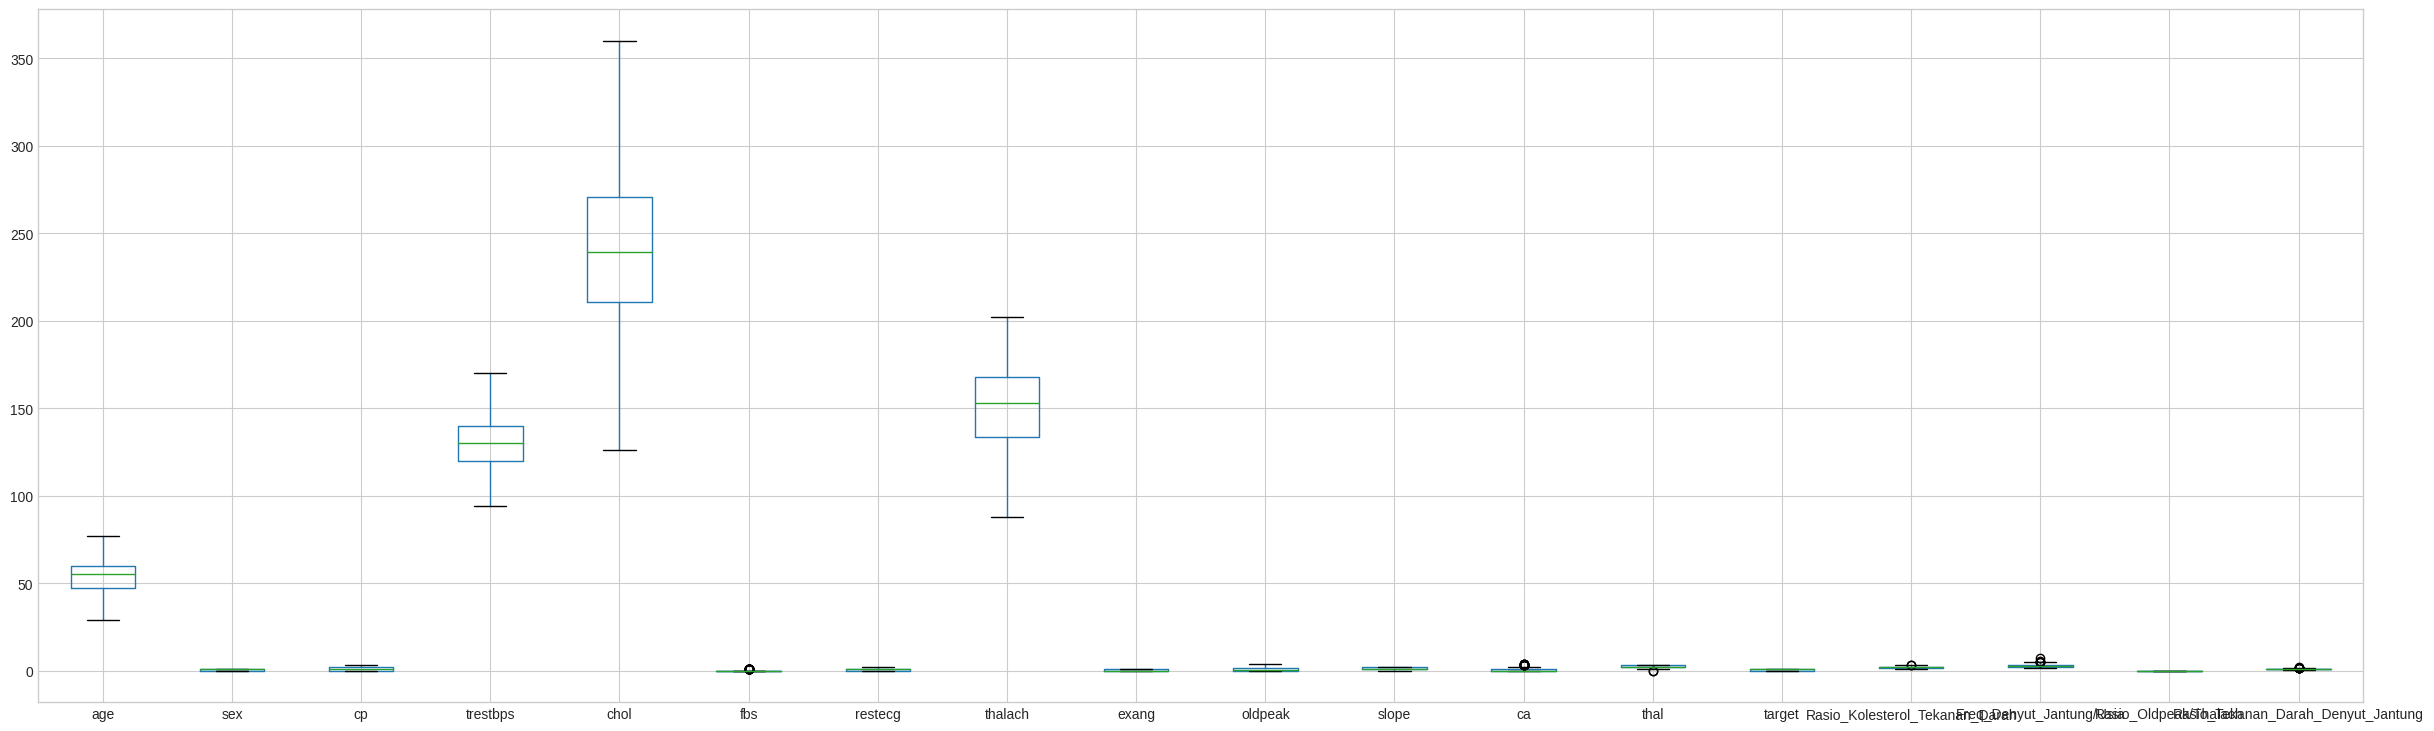

In [ ]:
# melihat gambaran secara umum semua data, mana yang mengandung outlier
plt.figure(figsize=(30,9))
data_ML.boxplot()
plt.show()

- setelah melihat gambaran semua datanya, tampaknya di kolom feature enginering ada data yang kelihatanya outlier pada kolom numerikal
kita cek lebih spesifik
- saya menggunakan metode looping seperti cara  diatas untuk menampilkan data outlier

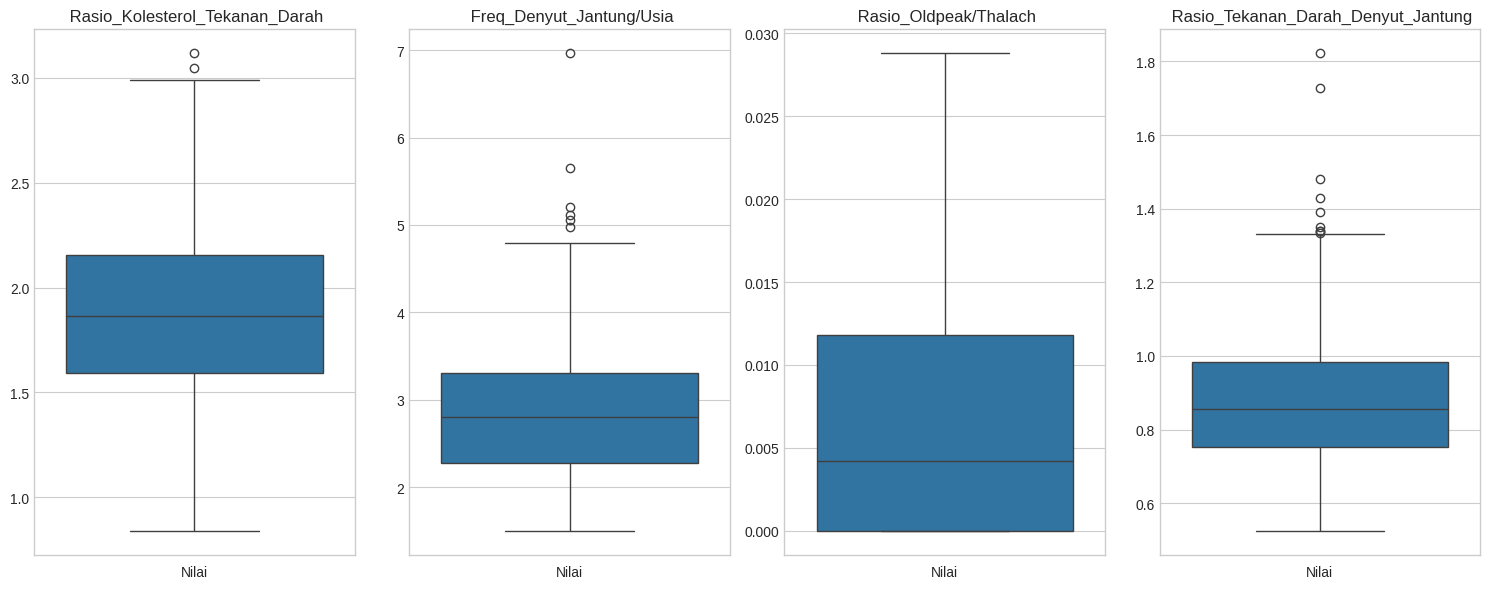

In [ ]:
kolom_fe = ['Rasio_Kolesterol_Tekanan_Darah','Freq_Denyut_Jantung/Usia','Rasio_Oldpeak/Thalach','Rasio_Tekanan_Darah_Denyut_Jantung']  # Ganti dengan nama kolom baru dari feature engineering

batas1 = {}
for kolom1 in kolom_fe:
    Q1 = data_ML[kolom1].quantile(0.25)
    Q3 = data_ML[kolom1].quantile(0.70)
    IQR = Q3 - Q1
    lower_bound1 = Q1 - 1.5 * IQR
    upper_bound1 = Q3 + 1.5 * IQR
    batas1[kolom1] = (lower_bound1, upper_bound1)

outliers1 = {}
for kolom1 in kolom_fe:
    lower_bound1, upper_bound1 = batas1[kolom1]
    outliers1[kolom1] = data_ML[(data_ML[kolom1] < lower_bound1) | (data_ML[kolom1] > upper_bound1)]

# Visualisasi data outlier menggunakan looping
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_fe), figsize=(15, 6))

for i, kolom1 in enumerate(kolom_fe):
    sns.boxplot(y=data_ML[kolom1], ax=axes[i])
    axes[i].set_title(f' {kolom1}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


- pada data Rasio_oldpeak/thalach tidak terdapat sama sekali outlier
-tetapi pada 3 data lainya semuanya terdapat outlier terutama di rasio tekanan darah memiliki outlier yang sangat banyak sekali

maka kita harus mengatasi masalah outlier itu agar hasil akurasinya tinggi

In [ ]:
# MENCETAK BATAS ATAS DAN BATAS BAWAH SETIAP KOLOMNYA


for kolom1, (lower_bound1, upper_bound1) in batas1.items():
    print(f"Kolom1 '{kolom1}':")
    print(f"  -- Lower Bound: {lower_bound1}")
    print(f"  -- Upper Bound: {upper_bound1}")
    print()

Kolom1 'Rasio_Kolesterol_Tekanan_Darah':
  -- Lower Bound: 0.8707652910469812
  -- Upper Bound: 2.7920023638333498

Kolom1 'Freq_Denyut_Jantung/Usia':
  -- Lower Bound: 0.8904722486152754
  -- Upper Bound: 4.594030542665404

Kolom1 'Rasio_Oldpeak/Thalach':
  -- Lower Bound: -0.014248768472906403
  -- Upper Bound: 0.023747947454844008

Kolom1 'Rasio_Tekanan_Darah_Denyut_Jantung':
  -- Lower Bound: 0.45816625032118197
  -- Upper Bound: 1.243895380816162



In [ ]:
# Copy datanya dulu
data_tanpa_outlier = data_ML.copy()

# Lalu hapus baris yang mengandung outlier menggunakan loop
# berdasarkan batas bawah dan atas

for kolom1 in kolom_fe:
    lower_bound1, upper_bound1 = batas1[kolom1]
    data_tanpa_outlier = data_tanpa_outlier[~((data_tanpa_outlier[kolom1] < lower_bound1) | (data_tanpa_outlier[kolom1] > upper_bound1))].reset_index(drop=True)

# Cetak DataFrame baru tanpa outlier
data_tanpa_outlier.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol,Rasio_Tekanan_Darah_Denyut_Jantung,Kategori_Tekanan_Darah,Pola
0,52,1,0,125,212,0,1,168,0,1.0,...,Lansia,1.696000,3.230769,0.005952,Tidak,Takikardia,Normal,0.744048,Prahipertensi,Tidak Sembuh
1,53,1,0,140,203,1,0,155,1,3.1,...,Lansia,1.450000,2.924528,0.020000,Tidak,Takikardia,Normal,0.903226,Hipertensi Tingkat 1,Tidak Sembuh
2,70,1,0,145,174,0,1,125,1,2.6,...,Lansia,1.200000,1.785714,0.020800,Ya,Takikardia,Normal,1.160000,Hipertensi Tingkat 1,Tidak Sembuh
3,61,1,0,148,203,0,1,161,0,0.0,...,Lansia,1.371622,2.639344,0.000000,Ya,Takikardia,Normal,0.919255,Hipertensi Tingkat 1,Tidak Sembuh
4,58,0,0,100,248,0,0,122,0,1.0,...,Lansia,2.480000,2.103448,0.008197,Ya,Takikardia,Tinggi,0.819672,Normal,Tidak Sembuh


- setelah data dibersihkan dari outlier, kita cek lagi gambaran datanya melalui boxplot untuk memastikan bahwa data ini bersih dari outlier

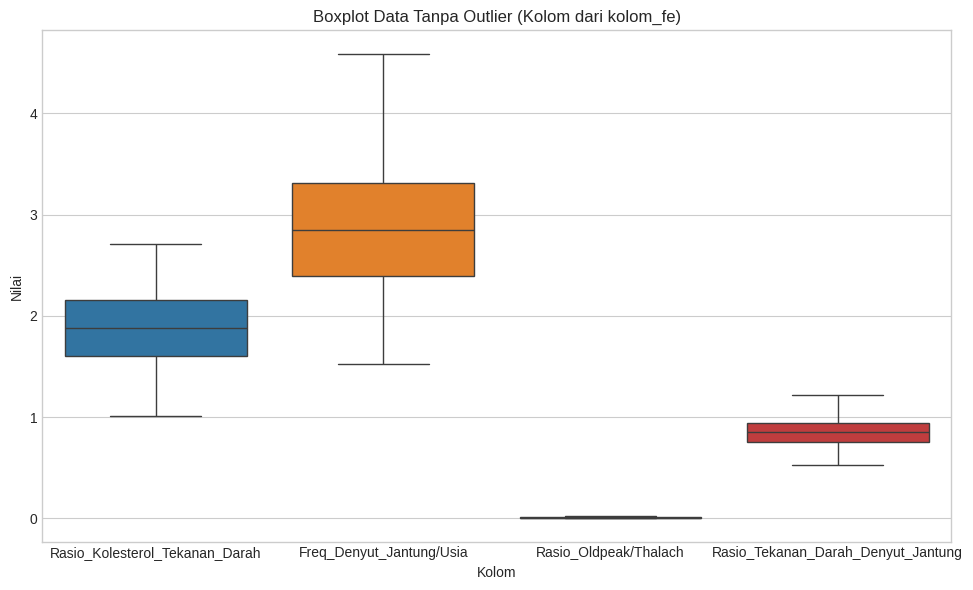

In [ ]:
# Visualisasi boxplot untuk kolom-kolom dalam kolom_fe setelah penghapusan outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_tanpa_outlier[kolom_fe])
plt.title('Boxplot Data Tanpa Outlier (Kolom dari kolom_fe)')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
# plt.xticks(rotation=45)  # Putar label kolom agar mudah dibaca
plt.tight_layout()
plt.show()

- dari operasi yang saya lakukan, sekarang outlier pada data telah hilang, operasi ini sama seperti mengulang step pada ouliter di data preparation,,saya melakukan penghilangan outlier karena ada kolom baru alias feature enginering yang nilainya berupa numerikal dan pastinya data tersebut akan ada yang mengandung outlier

## encoding

- pada data feature enginering, terdapat data kategorikal yaitu pada kolom
- usia kategori
- usia beresiko tinggi
- kategori denyut jantung, kolesterol, tekanan darah

maka dari itu diperlukan encoding agar data kategorikal berubah menjadi numerikal agar bisa diproses oleh MACHINE LEARNING

In [ ]:
# Buat LabelEncoder
label_encoder = LabelEncoder()

# Lakukan Label Encoding pada kolom-kolom kategorikal
encoded_data = data_tanpa_outlier.copy()
kolom_kategorikal = ['Usia_Kategori', 'Usia_Berisiko_Tinggi', 'Kategori_Denyut_Jantung', 'Kategori_Kolesterol', 'Kategori_Tekanan_Darah', 'Pola']
for kolom in kolom_kategorikal:
    encoded_data[kolom] = label_encoder.fit_transform(encoded_data[kolom])

# Tampilkan hasil encoding
encoded_data.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,Usia_Kategori,Rasio_Kolesterol_Tekanan_Darah,Freq_Denyut_Jantung/Usia,Rasio_Oldpeak/Thalach,Usia_Berisiko_Tinggi,Kategori_Denyut_Jantung,Kategori_Kolesterol,Rasio_Tekanan_Darah_Denyut_Jantung,Kategori_Tekanan_Darah,Pola
0,52,1,0,125,212,0,1,168,0,1.0,...,1,1.696000,3.230769,0.005952,0,1,0,0.744048,3,1
1,53,1,0,140,203,1,0,155,1,3.1,...,1,1.450000,2.924528,0.020000,0,1,0,0.903226,0,1
2,70,1,0,145,174,0,1,125,1,2.6,...,1,1.200000,1.785714,0.020800,1,1,0,1.160000,0,1
3,61,1,0,148,203,0,1,161,0,0.0,...,1,1.371622,2.639344,0.000000,1,1,0,0.919255,0,1
4,58,0,0,100,248,0,0,122,0,1.0,...,1,2.480000,2.103448,0.008197,1,1,1,0.819672,2,1


- bisa dilihat bahwa data yang sebelumnya adalah kategorikal sekarang sudah berubah menjadi integer/nominal dan langkah selanjutnya saya akan melihat korelasi antar tabel menggunakan matrix korelasi
- dan jika encoding idak dilakukan maka kita juga tidak akan bisa melihat matrix korelasi maka itu ENCODING SANGAT DIPERLUKAN UNTUK DATA KATEGORIKAL

In [ ]:
# letakkan encoded_data pada variabel data_tanpa_outlier
data_tanpa_outlier = encoded_data

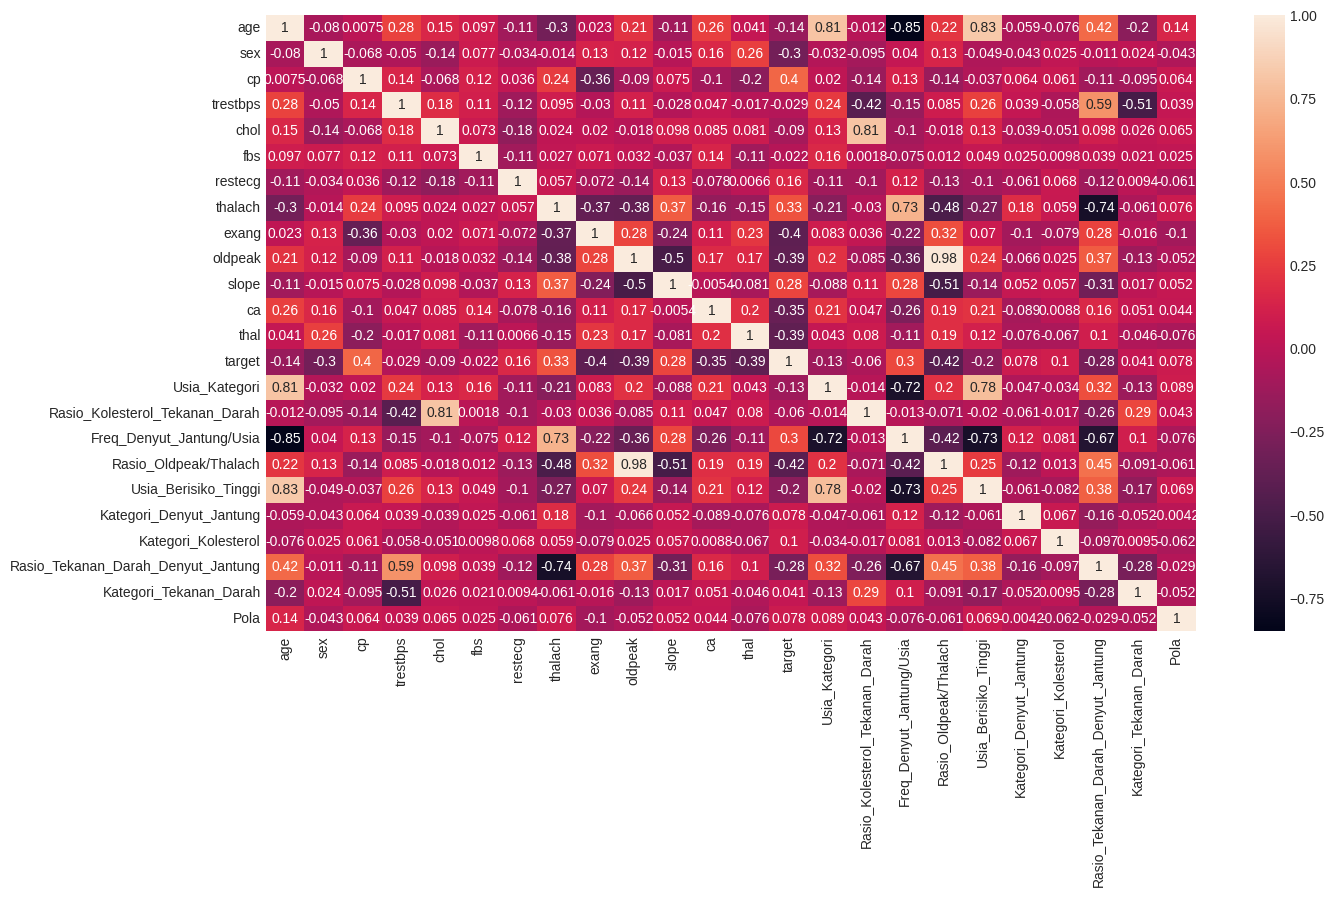

In [ ]:
# buat matrix korelasi
plt.figure(figsize=(15, 8))

# Membuat heatmap dengan seaborn
sns.heatmap(data_tanpa_outlier.corr(), annot=True)

# Menampilkan heatmap
plt.show()

dari matrix korelasi diatas yang bersumber dari

https://info.populix.co/articles/koefisien-korelasi-adalah/#:~:text=0%20%3A%20Tidak%20ada%20korelasi%20antara,%E2%80%93%200%2C5%20%3A%20Korelasi%20cukup

saya mengambil batasan yaitu seperti berikut

1. 0             : Tidak ada korelasi antara dua variabel
2. > 0 – 0,25    : Korelasi sangat lemah
3. > 0,25 – 0,5  : Korelasi cukup
4. > 0,5 – 0,75  : Korelasi kuat
5. > 0,75 – 0,99 : Korelasi sangat kuat
6.  1            : Korelasi hubungan sempurna positif
7. -1            : Korelasi hubungan sempurna negatif


lalu pada data diatas, terdapat beberapa angka yang jumlahnya lebih dari 0,25


## feature importance

In [ ]:
# Hitung matriks korelasi antara fitur-fitur dan target
correlation_matrix = data_tanpa_outlier.corr()

# Pilih baris atau kolom matriks korelasi yang berkaitan dengan target
positive_correlations = correlation_matrix['target'][correlation_matrix['target'] > 0.25]
negative_correlations = correlation_matrix['target'][correlation_matrix['target'] < -0.25]

# Tentukan fitur-fitur yang berkorelasi positif dengan target
positive_relevant_columns = positive_correlations.index
positive_correlation_values = positive_correlations.values

- disini saya melakukan filter bagi yang korelasi dengan target nilainya lebih dari 0.25 maka masuk kedalam kriteria positif
- dan yang nilainya itu -0.25 masuk kedalam kriteria negatif korelasi

In [ ]:
# Tampilkan hasil korelasi positif
print('korelasi positif')
for column, correlation_value in zip(positive_relevant_columns, positive_correlation_values):
    print(f"Fitur: {column}, Korelasi dengan target: {correlation_value}")

korelasi positif
Fitur: cp, Korelasi dengan target: 0.4034742190362219
Fitur: thalach, Korelasi dengan target: 0.3329048958235489
Fitur: slope, Korelasi dengan target: 0.2820198306960825
Fitur: target, Korelasi dengan target: 1.0
Fitur: Freq_Denyut_Jantung/Usia, Korelasi dengan target: 0.2974142689254197


- setelah melakukan filter, data yang nilainya positif korelasi akan muncul dan dicetak  seperti cp,thalach,slope,targrt dan feature enginering yang saya buat ternyata masuk kedalam kriteria treshold yaitu Freq_Denyut_Jantung/Usia
- lalu dibawah ini adlaah data yang korelasinya negatif

In [ ]:
# Tampilkan hasil korelasi negatif
print('Korelasi negatif')
for column, correlation_value in zip(negative_correlations.index, negative_correlations.values):
    print(f"Fitur: {column}, Korelasi dengan target: {correlation_value}")


Korelasi negatif
Fitur: sex, Korelasi dengan target: -0.3007127296063382
Fitur: exang, Korelasi dengan target: -0.39810975178190733
Fitur: oldpeak, Korelasi dengan target: -0.39026726089623376
Fitur: ca, Korelasi dengan target: -0.3521497866364833
Fitur: thal, Korelasi dengan target: -0.3904897815609857
Fitur: Rasio_Oldpeak/Thalach, Korelasi dengan target: -0.41797127112847166
Fitur: Rasio_Tekanan_Darah_Denyut_Jantung, Korelasi dengan target: -0.2827014565550028


In [ ]:
featuresX = positive_relevant_columns.to_list()

## splitting data

- spliting data berguna untuk memisahkan data,, ada target dan features
- untuk target nama variabelnya adalah y
- untuk features nama variabelnya adalah X (besar),,,kolom ini berisi data yang tidak dipengaruhi oleh data lain sedangkan data y hasilnya dipengaruhi oleh data lain

In [ ]:
df_encoded = pd.DataFrame(data_tanpa_outlier)
target_columns = ['target']

import pandas as pd

# Membuat DataFrame baru hanya dengan fitur-fitur independen
featuresX = ['cp','thalach','slope','Freq_Denyut_Jantung/Usia']  # Definisikan fitur-fitur independen di sini
X = df_encoded[featuresX]

# Memisahkan kolom target
target_columns = ['target']
y = df_encoded[target_columns]
y

,target
0,0
1,0
2,0
3,0
4,1
...,...
234,0
235,1
236,1
237,0


In [ ]:
X

,cp,thalach,slope,Freq_Denyut_Jantung/Usia
0,0,168,2,3.230769
1,0,155,0,2.924528
2,0,125,0,1.785714
3,0,161,2,2.639344
4,0,122,1,2.103448
...,...,...,...,...
234,2,158,2,2.468750
235,2,115,1,1.691176
236,2,175,1,3.977273
237,0,161,2,3.096154


### split data train & test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

- kode ini digunakan untuk membagi dataset, data train dan data testing yang artinya
- dari data saya 80% itu digunakan untuk data pelatihan atau melatih model dan untuk yang 20% digunakan untuk mengetes model tersebut

In [ ]:
X_train

,cp,thalach,slope,Freq_Denyut_Jantung/Usia
138,1,188,2,4.272727
60,0,160,0,2.580645
207,0,131,1,2.258621
165,0,143,1,2.698113
206,2,168,1,4.097561
...,...,...,...,...
106,2,179,2,4.589744
14,2,155,1,2.583333
92,2,157,2,3.078431
179,2,146,1,2.354839


## feature scaling

In [ ]:
standart_scaler = StandardScaler()
X_train = standart_scaler.fit_transform(X_train)
X_test = standart_scaler.fit_transform(X_test)

- nah setelah membagi data train dan data testing harus melakukan scaling
- scaling harus dilakukan karena satu fitur dapat memiliki rentang nilai dari 0 hingga 100, sedangkan yang lain hanya memiliki rentang nilai dari 0 hingga 1. Jika tidak dilakukan penskalaan, fitur-fitur dengan skala yang lebih besar akan memiliki dampak yang lebih besar terhadap proses modeling machine learrning, yang dapat menghasilkan bias dalam model.

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])

[[ 0.01538968  1.85218665  0.93559074  1.98591628]
 [-0.96441965  0.41723167 -2.53427006 -0.46650119]
 [-0.96441965 -1.0689717  -0.79933966 -0.93322702]
 [-0.96441965 -0.45399099 -0.79933966 -0.29624899]
 [ 0.995199    0.82721881 -0.79933966  1.73203919]
 [ 1.97500833 -1.0177233  -0.79933966  0.04466705]
 [-0.96441965 -1.0177233  -0.79933966 -1.21747434]
 [ 0.995199    0.10974132  0.93559074  0.16970893]
 [ 1.97500833 -1.0689717  -0.79933966 -1.45509406]
 [-0.96441965 -0.71023295  0.93559074 -1.17629966]]


- Hasil cetakan tersebut adalah nilai-nilai dalam format matriks, di mana setiap baris mewakili sebuah sampel dan setiap kolom mewakili sebuah fitur Misalnya, nilai 0.01538968 adalah nilai pertama dalam sampel pertama, dan seterusnya.

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # standarisasi nilai-nilai dari dataset
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Ubah variabel target DataFrame menjadi array satu dimensi
y_train_array = y_train.values.ravel()

# latih model dengan fungsi fit
model1 = LogisticRegression() #membuat sebuah objek logistic regression.
model1.fit(X_train, y_train_array)


LogisticRegression()

-  Kode ini digunakan untuk melatih model Regresi Logistik menggunakan pustaka scikit-learn

In [ ]:
model1.score(X_test, y_test)

0.7708333333333334

- dan kode digunakan untuk menghitung skor akurasi model Regresi Logistik pada data uji (X_test) dan variabel target yang sesuai dengan data uji (y_test).
- akurasi yang muncul yaitu sebesar 0.75

In [ ]:
#gunakan model utk membuat predisi pada test data
y_pred_lr = model1.predict(X_test)

- lalu untuk kode diatas digunakan untuk membuat prediksi menggunakan model Regresi Logistik yang telah dilatih pada data uji (X_test). Prediksi ini kemudian disimpan dalam variabel y_pred_lr

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.76      0.85      0.80        26

    accuracy                           0.77        48
   macro avg       0.77      0.76      0.77        48
weighted avg       0.77      0.77      0.77        48



- kode diatas digunakan untuk amenyajikan beberapa metrik evaluasi klasifikasi
- Laporan klasifikasi ini mencakup metrik seperti presisi, recall, F1-score, dan dukungan (support) untuk setiap kelas target, serta metrik rata-rata untuk semua kelas.

--------------insight--------------------
- Presisi yang tinggi untuk kelas 0 (0.78) menunjukkan bahwa ketika model memprediksi suatu contoh sebagai kelas 0, sebagian besar prediksi tersebut benar.
- F1-score untuk kelas 0 (0.70) dan kelas 1 (0.79) menunjukkan keseimbangan antara Presisi dan Recall untuk setiap kelas. Semakin tinggi nilai F1-score, semakin baik keseimbangan antara Presisi dan Recall.
- Akurasi model secara keseluruhan adalah 0.75, yang menunjukkan bahwa sekitar 75% dari semua prediksi yang dibuat oleh model benar.

## random forest

- Random Forest adalah algoritma machine learning yang menggabungkan banyak pohon keputusan untuk membuat prediksi yang akurat.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import RandomizedSearchCV

model1 = RandomForestClassifier(random_state=10)
#model = RandomizedSearchCV(estimator = clf, param_distributions, n_iter = 80,
                               #cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model1.fit(X_train,y_train_array)

#best_model = model.best_estimator_

y_pred_rf =model1.predict(X_test)
acc = accuracy_score(y_test,y_pred_rf)
print("Accuracy:", acc)

Accuracy: 0.7083333333333334


- akurasi dari model Random Forest yang telah dibuat adalah sebesar 0.75, atau 75%. Artinya, model tersebut mampu memprediksi dengan benar sekitar 75% dari data uji yang digunakan.

### confusion matrix

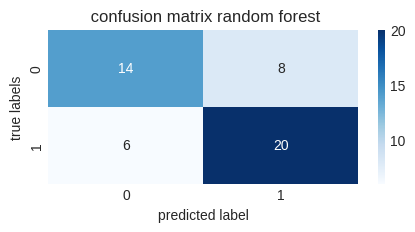

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(' confusion matrix random forest')
plt.xlabel('predicted label')
plt.ylabel('true labels')
plt.show()

In [ ]:
TN1 = 14
FN1 = 6
FP1 = 8
TP1 = 20

specificity_rf = TN1 / (TN1 + FP1)
print( 'Specificity Random Forest :', specificity_rf)

sensivicity_rf = TP1 / (TP1 + FN1)
print( 'sensivicity Random Forest :', sensivicity_rf)

Specificity Random Forest : 0.6363636363636364
sensivicity Random Forest : 0.7692307692307693


- Specificity : Dalam kasus ini, spesifisitas untuk model Random Forest adalah 0.6363636363636364 atau sekitar 63.64%. Ini menunjukkan bahwa model Random Forest mampu mengidentifikasi sebagian besar dari kelas negatif dengan benar, yang dalam hal ini adalah kelas 0.

- Sensitivity (Sensitivitas): Sensitivitas juga memiliki nilai yang sama dengan spesifisitas, yaitu  0.7692307692307693 atau sekitar 76.92%. Sensitivitas mengukur kemampuan model untuk mengidentifikasi sebagian besar dari kelas positif dengan benar, yang dalam kasus ini adalah kelas 1.

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        22
           1       0.71      0.77      0.74        26

    accuracy                           0.71        48
   macro avg       0.71      0.70      0.70        48
weighted avg       0.71      0.71      0.71        48



------------insight------------
- Untuk kelas 0, precision sebesar 0.81 menunjukkan bahwa sebagian besar data yang diprediksi sebagai kelas 0 adalah benar-benar kelas 0. Namun, recall yang rendah sebesar 0.59 menunjukkan bahwa model kurang baik dalam mengidentifikasi data sebenarnya dari kelas 0.
- Untuk kelas 1, recall sebesar 0.88 menunjukkan bahwa model cukup baik dalam mengidentifikasi sebagian besar data dari kelas 1. Namun, precision yang sedikit lebih rendah sebesar 0.72 menunjukkan bahwa ada beberapa data dari kelas 0 yang salah diprediksi sebagai kelas 1.
- F1-score untuk kelas 0 adalah 0.68, sedangkan untuk kelas 1 adalah 0.79. F1-score yang baik menunjukkan keseimbangan yang baik antara precision dan recall.
- Dengan melihat weighted average dari precision, recall, dan F1-score, kita bisa melihat bahwa performa model cenderung lebih baik dalam mengidentifikasi data dari kelas 1 daripada kelas 0.

## decision tree

Decision tree adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Pada dasarnya, algoritma ini membuat keputusan dengan mengobservasi fitur-fitur dari data dan membagi data menjadi subset-subset yang semakin kecil berdasarkan aturan-aturan tertentu.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=4)

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# digunakan untuk melakukan prediksi terhadap data uji menggunakan model decision tree (model2).
# Kemudian, hasil prediksi tersebut diubah bentuknya menjadi matriks dengan satu kolom.

y_pred_dt = model2.predict(X_test).reshape(-1, 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_dt, y_test)

0.8125

- nilai akurasi sebesar 0.79 adalah bahwa model decision tree yang dilatih mampu mengklasifikasikan data uji dengan tingkat keakuratan sekitar 79%. Hal ini mengindikasikan bahwa model memiliki performa yang cukup baik dalam melakukan prediksi terhadap data yang belum pernah dilihat sebelumnya.

### confusion matrix

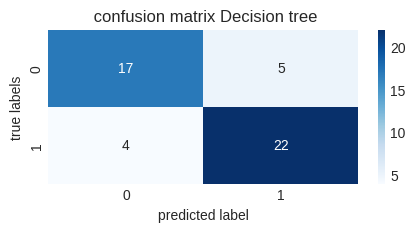

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(' confusion matrix Decision tree')
plt.xlabel('predicted label')
plt.ylabel('true labels')
plt.show()

In [ ]:
TN2 = 17
FN2 = 4
FP2 = 5
TP2 = 22

specificity_dt = TN2 / (TN2 + FP2)
print( 'Specificity Decision Tree :', specificity_dt)

sensivicity_dt = TP2 / (TP2 + FN2)
print( 'sensivicity Decision Tree :', sensivicity_dt)

Specificity Decision Tree : 0.7727272727272727
sensivicity Decision Tree : 0.8461538461538461


- Specificity (Spesifisitas): Nilai spesifisitas untuk model Decision Tree adalah sekitar 0.7727272727272727 atau sekitar 77.27%. Ini menunjukkan bahwa model Decision Tree mampu mengidentifikasi sebagian besar dari kelas negatif dengan benar

- Sensitivity (Sensitivitas): Nilai sensitivitas untuk model Decision Tree adalah sekitar 0.8461538461538461 atau sekitar 84.62%. Ini menunjukkan bahwa model Decision Tree mampu mengidentifikasi sebagian besar dari kelas positif dengan benar

- kesimpulanya menunjukkan bahwa model Decision Tree memiliki performa yang baik dalam mengklasifikasikan kedua kelas, dengan sensitivitas yang sedikit lebih tinggi daripada spesifisitas. Dalam konteks kesehatan atau deteksi penyakit, hasil ini menunjukkan bahwa model mampu dengan baik dalam mengidentifikasi kasus yang positif (sensitivitas tinggi) dan menghindari kesalahan mengidentifikasi kasus yang negatif (spesifisitas tinggi).

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.81      0.85      0.83        26

    accuracy                           0.81        48
   macro avg       0.81      0.81      0.81        48
weighted avg       0.81      0.81      0.81        48



- Precision untuk kelas 0 adalah 0.77, yang berarti 77% dari semua prediksi yang diklasifikasikan sebagai kelas 0 adalah benar.
- Recall untuk kelas 0 adalah 0.77, yang berarti model dapat mengidentifikasi 77% dari semua nilai sebenarnya yang merupakan kelas 0.
- F1-score untuk kelas 0 adalah 0.77, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 0.
- Precision untuk kelas 1 adalah 0.81, yang berarti 81% dari semua prediksi yang diklasifikasikan sebagai kelas 1 adalah benar.
- Recall untuk kelas 1 adalah 0.81, yang berarti model dapat mengidentifikasi 81% dari semua nilai sebenarnya yang merupakan kelas 1.
- F1-score untuk kelas 1 adalah 0.81, yang merupakan rata-rata harmonik dari precision dan recall untuk kelas 1.
- Accuracy model adalah 0.79, yang menunjukkan bahwa model secara keseluruhan dapat memprediksi dengan benar sekitar 79% dari seluruh data uji.
- Macro average dari precision, recall, dan F1-score adalah 0.79, menunjukkan bahwa rata-rata dari metrik evaluasi untuk kedua kelas target adalah 79%.
- Weighted average dari precision, recall, dan F1-score juga adalah 0.79, menunjukkan bahwa rata-rata dari metrik evaluasi dengan mempertimbangkan jumlah kemunculan masing-masing kelas target dalam data uji adalah 79%.

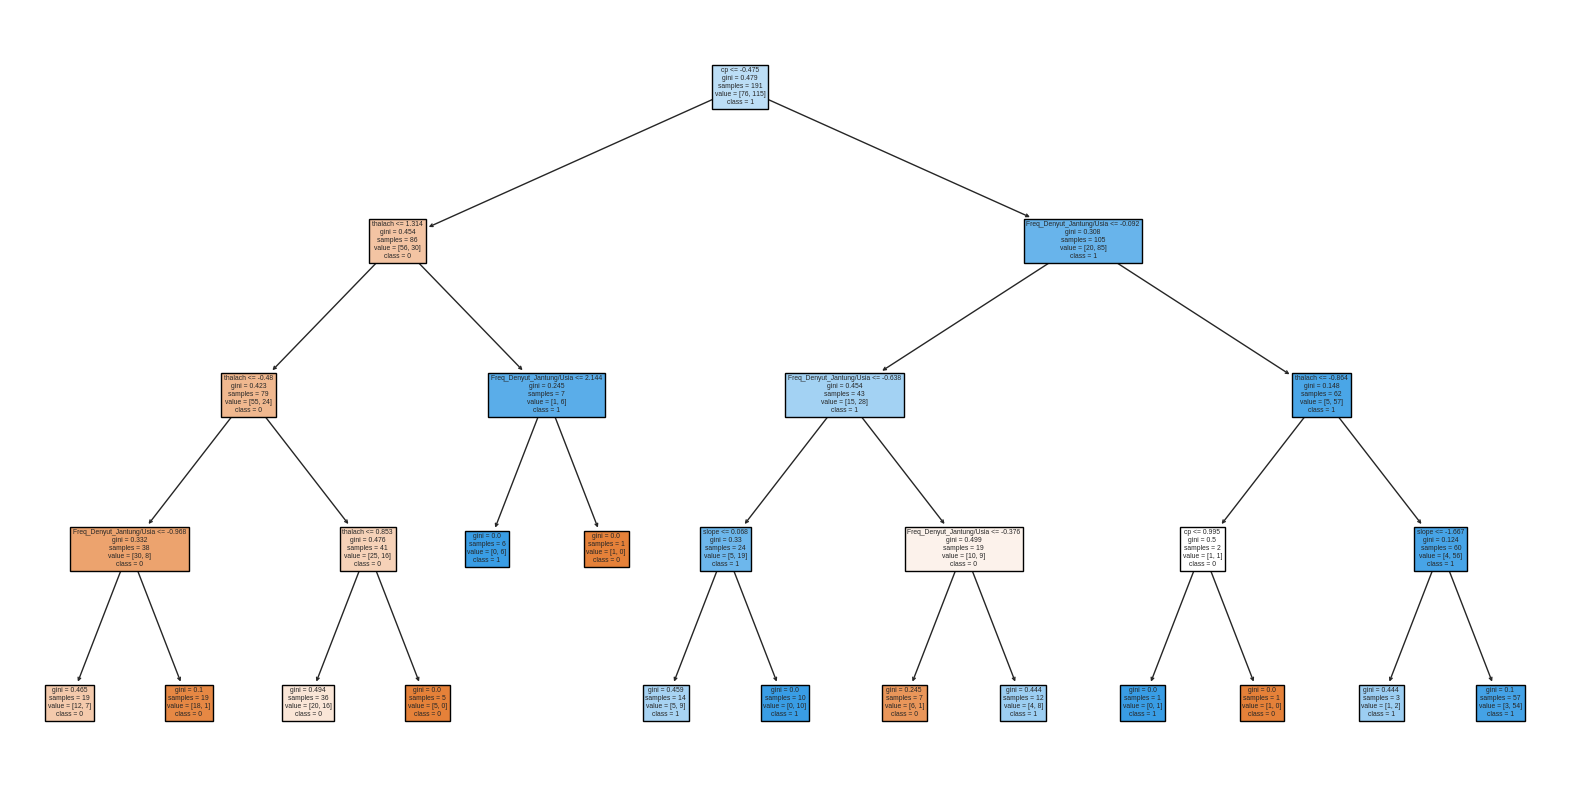

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Membuat model Decision Tree
model2 = DecisionTreeClassifier(max_depth=4)

# Melatih model
model2.fit(X_train, y_train)

# Visualisasi decision tree
plt.figure(figsize=(20,10))
plot_tree(model2, feature_names=featuresX, class_names=["0", "1"], filled=True)
plt.show()


Membuat visualisasi dari decision tree yang telah dilatih menggunakan plot_tree. Decision tree akan ditampilkan dengan menggunakan fitur-fitur (feature_names) dan kelas-kelas (class_names) yang sesuai. Parameter filled=True digunakan untuk memberi warna pada blok-blok di dalam decision tree yang mewakili kelas target.

## SVM

SVM (Support Vector Machine) adalah algoritma pembelajaran yang digunakan untuk tugas klasifikasi dan regresi. Tujuannya adalah untuk menemukan hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur sedemikian rupa sehingga jarak antara hyperplane dan titik-titik terdekat (yang disebut vektor pendukung) dari kedua kelas itu maksimal.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model SVM
model3 = SVC(kernel='linear', random_state=10)  # Menggunakan kernel linear sebagai contoh

# Latih model dengan data latih
model3.fit(X_train, y_train_array)

# Lakukan prediksi pada data uji
y_pred_svm = model3.predict(X_test)

# Evaluasi model3
acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", acc)

Accuracy: 0.75


- Hasil output yang diberikan adalah nilai akurasi dari model SVM yang telah dilatih dan dievaluasi menggunakan data uji. Dalam hal ini, nilai akurasi yang diperoleh adalah sebesar 0.75 atau 75%. Ini berarti model berhasil memprediksi dengan benar sekitar 75% dari seluruh data uji.

### confusion matrix

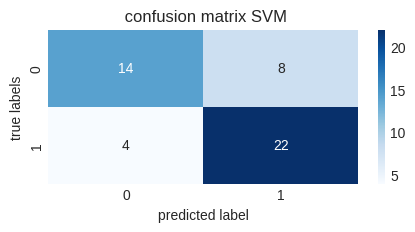

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,2))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title(' confusion matrix SVM')
plt.xlabel('predicted label')
plt.ylabel('true labels')
plt.show()

In [ ]:
TN3 = 14
FN3 = 4
FP3 = 8
TP3 = 22

specificity_svm = TN3 / (TN3 + FP3)
print( 'Specificity SVM :', specificity_svm)

sensivicity_svm = TP3 / (TP3 + FN3)
print( 'sensivicity SVM :', sensivicity_svm)

Specificity SVM : 0.6363636363636364
sensivicity SVM : 0.8461538461538461


- Specificity (Spesifisitas): Nilai spesifisitas untuk model SVM adalah sekitar 0.6363636363636364 atau sekitar 63.64%. Ini menunjukkan bahwa model SVM mampu mengidentifikasi sebagian besar dari kelas negatif dengan benar

- Sensitivity (Sensitivitas): Nilai sensitivitas untuk model SVM adalah sekitar 0.8461538461538461 atau sekitar 84.62%. Ini menunjukkan bahwa model SVM mampu mengidentifikasi sebagian besar dari kelas positif dengan benar

- Insight ini menunjukkan bahwa model SVM memiliki performa yang baik dalam mengklasifikasikan kedua kelas, dengan sensitivitas yang sedikit lebih tinggi daripada spesifisitas. Dalam konteks kesehatan atau deteksi penyakit, hasil ini menunjukkan bahwa model mampu dengan baik dalam mengidentifikasi kasus yang positif (sensitivitas tinggi).

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.73      0.85      0.79        26

    accuracy                           0.75        48
   macro avg       0.76      0.74      0.74        48
weighted avg       0.75      0.75      0.75        48



- Precision: Precision mengukur proporsi dari hasil prediksi positif yang benar dari semua hasil prediksi positif yang diberikan oleh model. Untuk kelas 0, precision sebesar 0.81, yang berarti sekitar 81% dari prediksi positif untuk kelas 0 adalah benar. Sedangkan untuk kelas 1, precision sebesar 0.72, yang berarti sekitar 72% dari prediksi positif untuk kelas 1 adalah benar.

- Recall: Recall mengukur proporsi dari data yang sebenarnya positif yang berhasil diprediksi dengan benar oleh model. Untuk kelas 0, recall sebesar 0.59, yang berarti sekitar 59% dari semua data yang sebenarnya kelas 0 berhasil diprediksi dengan benar oleh model. Sedangkan untuk kelas 1, recall sebesar 0.88, yang berarti sekitar 88% dari semua data yang sebenarnya kelas 1 berhasil diprediksi dengan benar oleh model.

- F1-Score: F1-score adalah rata-rata harmonik dari precision dan recall, yang memberikan perbandingan yang seimbang antara kedua metrik tersebut. Untuk kelas 0, F1-score sebesar 0.68, dan untuk kelas 1, F1-score sebesar 0.79.

- Accuracy: Akurasi adalah proporsi dari total prediksi yang benar dari semua prediksi yang dilakukan oleh model. Dalam hal ini, akurasi sebesar 0.75, yang berarti sekitar 75% dari seluruh prediksi yang dilakukan oleh model adalah benar.

Dari hasil classification report tersebut, dapat disimpulkan bahwa model memiliki kinerja yang lebih baik dalam memprediksi kelas 1 dibandingkan dengan kelas 0, dengan recall yang lebih tinggi untuk kelas 1. Namun, precision untuk kelas 0 lebih tinggi dibandingkan dengan kelas 1. F1-score memberikan gambaran yang seimbang antara precision dan recall untuk masing-masing kelas. Overall, model memiliki akurasi sebesar 75%, yang menunjukkan kinerja yang cukup baik dalam melakukan klasifikasi pada dataset yang diberikan.

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model Decision Tree
dt_model = DecisionTreeClassifier(random_state=10)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train_array.ravel(), cv=5, scoring='accuracy')

# Model RandomForestClassifier
rf_model = RandomForestClassifier(random_state=10)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train_array.ravel(), cv=5, scoring='accuracy')

# Model SVC
svm_model = SVC(kernel='linear', random_state=10)
svm_cv_scores = cross_val_score(svm_model, X_train,y_train_array.ravel(), cv=5, scoring='accuracy')

# Menampilkan hasil cross-validation
print("Cross-validation scores for Decision Tree:", dt_cv_scores)
print("Mean accuracy of Decision Tree:", dt_cv_scores.mean())
print('\n')
print("Cross-validation scores for RandomForestClassifier:", rf_cv_scores)
print("Mean accuracy of RandomForestClassifier:", rf_cv_scores.mean())
print('\n')
print("Cross-validation scores for SVC:", svm_cv_scores)
print("Mean accuracy of SVC:", svm_cv_scores.mean())


Cross-validation scores for Decision Tree: [0.56410256 0.68421053 0.71052632 0.55263158 0.52631579]
Mean accuracy of Decision Tree: 0.607557354925776


Cross-validation scores for RandomForestClassifier: [0.61538462 0.65789474 0.76315789 0.63157895 0.68421053]
Mean accuracy of RandomForestClassifier: 0.6704453441295547


Cross-validation scores for SVC: [0.64102564 0.71052632 0.71052632 0.78947368 0.63157895]
Mean accuracy of SVC: 0.6966261808367072


---------------insight------------------
- Decision Tree: Model Decision Tree memiliki akurasi yang bervariasi, dengan nilai akurasi antara 0.526 hingga 0.710. Rata-rata akurasinya sekitar 0.608. Variabilitas ini mungkin menunjukkan bahwa model Decision Tree tidak konsisten dalam kinerjanya di setiap lipatan.

- Random Forest Classifier: Model Random Forest diatas tingkat akurasi yang lebih tinggi daripada Decision Tree, dengan nilai antara 0.615 hingga 0.763 di setiap lipatan. Rata-rata akurasinya sekitar 0.670. Ini menunjukkan bahwa Random Forest cenderung memberikan kinerja yang lebih baik dan lebih stabil daripada Decision Tree dalam kasus ini.

- SVC (Support Vector Classifier): SVC memiliki akurasi yang cukup konsisten di setiap lipatan, dengan nilai antara 0.632 hingga 0.789. Rata-rata akurasinya sekitar 0.697. Ini menunjukkan bahwa SVC memberikan kinerja yang konsisten dan relatif tinggi dalam kasus ini, meskipun tidak sebaik Random Forest.

---------------kesimpulan-------------
- Dengan demikian, dari hasil cross-validation ini, kita dapat melihat bahwa Random Forest dan SVC cenderung memberikan kinerja yang lebih baik daripada Decision Tree dalam kasus ini, dengan SVC memiliki akurasi rata-rata tertinggi di antara ketiganya.

## bootstrapping

In [ ]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier

# Jumlah iterasi bootstraping
n_iterations = 100

# Inisialisasi list untuk menyimpan skor akurasi dari setiap iterasi
rf_scores = []
svm_scores = []
dt_scores = []

# Melakukan bootstraping
for _ in range(n_iterations):
    # Sampling ulang indeks dataset dengan pengembalian
    indices_bootstrap = resample(range(len(X_train)), replace=True, random_state=_)

    # Mengindeks dataset dengan indeks yang dihasilkan
    X_bootstrap, y_bootstrap = X_train[indices_bootstrap], y_train_array[indices_bootstrap]

    # Model RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=10)
    rf_model.fit(X_bootstrap, y_bootstrap)
    rf_pred = rf_model.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_pred)
    rf_scores.append(rf_acc)

    # Model SVC
    svm_model = SVC(kernel='linear', random_state=10)
    svm_model.fit(X_bootstrap, y_bootstrap.ravel())
    svm_pred = svm_model.predict(X_test)
    svm_acc = accuracy_score(y_test, svm_pred)
    svm_scores.append(svm_acc)

    # Model Decision Tree
    dt_model = DecisionTreeClassifier(random_state=10)
    dt_model.fit(X_bootstrap, y_bootstrap)
    dt_pred = dt_model.predict(X_test)
    dt_acc = accuracy_score(y_test, dt_pred)
    dt_scores.append(dt_acc)

# Menampilkan rata-rata skor akurasi
print("RandomForestClassifier:")
print("Mean accuracy:", np.mean(rf_scores))

print("\nSVC:")
print("Mean accuracy:", np.mean(svm_scores))

print("\nDecision Tree:")
print("Mean accuracy:", np.mean(dt_scores))


RandomForestClassifier:
Mean accuracy: 0.7004166666666667

SVC:
Mean accuracy: 0.7489583333333333

Decision Tree:
Mean accuracy: 0.67875


---------insight-------------

- Random Forest Classifier: Model Random Forest memiliki rata-rata akurasi sekitar 0.700. Ini menunjukkan bahwa Random Forest cenderung memberikan kinerja yang stabil dan moderat dalam memprediksi data uji yang tidak terlihat.

- SVC (Support Vector Classifier): Model SVC memiliki rata-rata akurasi sekitar 0.749. Ini menunjukkan bahwa SVC cenderung memberikan kinerja yang lebih baik daripada Random Forest, dengan tingkat akurasi yang lebih tinggi.

- Decision Tree: Model Decision Tree memiliki rata-rata akurasi sekitar 0.679. Ini menunjukkan bahwa Decision Tree cenderung memberikan kinerja yang lebih rendah dibandingkan dengan Random Forest dan SVC dalam kasus ini.

------kesimpulan----------
- Dengan demikian, dari hasil bootstraping ini, kita dapat melihat bahwa SVC memiliki akurasi rata-rata tertinggi di antara ketiga model yang diuji, diikuti oleh Random Forest, dan kemudian Decision Tree.

##learning curve

In [ ]:
#set train size
#768 x 80% = 614 (20% for validation)
train_sizes = [1, 20, 50, 76 ,100, 130,150,191]

In [ ]:
from sklearn.model_selection import learning_curve
import pandas as pd
import matplotlib.pyplot as plt

def learn_curve_plot(estimator, x, y, cv, train_sizes):
    y = y['target'].values.ravel()  # Mengubah bentuk kolom 'target' menjadi array 1 dimensi menggunakan ravel()
    train_sizes, train_scores, validation_scores = learning_curve(estimator, X=x, y=y, train_sizes=train_sizes, cv=cv)
    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)

    # Print
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index=train_sizes))
    print('\n', '-' * 20)  # separator
    print('\nMean validation scores\n\n', pd.Series(validation_scores_mean, index=train_sizes))

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, validation_scores_mean, label='Validation error')
    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title('Learning Curve', fontsize=18, y=1.03)
    plt.legend()

# Contoh pemanggilan fungsi learn_curve_plot
# learn_curve_plot(estimator=model1, x=X, y=y, cv=5, train_sizes=train_sizes)


Mean training scores

 1      1.000000
20     1.000000
50     1.000000
76     1.000000
100    1.000000
130    1.000000
150    1.000000
191    0.995812
dtype: float64

 --------------------

Mean validation scores

 1      0.410018
20     0.635904
50     0.664982
76     0.690337
100    0.702926
130    0.707270
150    0.686348
191    0.682181
dtype: float64


<ipython-input-107-d3f7c0db1777>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


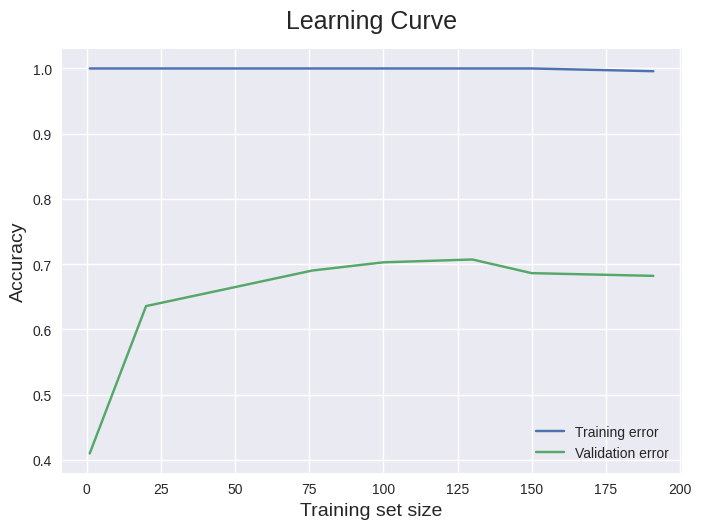

In [ ]:
learn_curve_plot(estimator=model1, x=X, y=y, cv=5, train_sizes=train_sizes)

## hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [80, 90, 100, 110, 120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = display(best_grid.score(X_test, y_test))
grid_accuracy

0.7708333333333334

In [ ]:
y_pred_grid_rf = best_grid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_grid_rf))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        22
           1       0.78      0.81      0.79        26

    accuracy                           0.77        48
   macro avg       0.77      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48



-  Precision untuk kelas 0 (tidak sembuh) adalah sekitar 78%, yang berarti dari semua pasien yang diprediksi tidak sembuh, sekitar 78% dari mereka benar-benar tidak sembuh. Precision untuk kelas 1 (sembuh) adalah sekitar 73%, yang berarti dari semua pasien yang diprediksi sembuh, sekitar 73% dari mereka benar-benar sembuh
-  Recall untuk kelas 0 adalah sekitar 64%, yang berarti dari semua pasien yang sebenarnya tidak sembuh, model berhasil mengidentifikasi sekitar 64% dari mereka.
-  Akurasi keseluruhan model adalah sekitar 75%, yang berarti model dapat mengklasifikasikan dengan benar sekitar 75% dari sampel uji.
- F1-score untuk kelas yang tidak sembuh adalah sekitar 0.70, sedangkan untuk kelas yang sembuh adalah sekitar 0.79. F1-score yang tinggi menunjukkan kinerja yang baik dalam mengklasifikasikan kedua kelas dengan seimbang.

## conclusion & recomendation

### random forest

- akurasi dari model Random Forest yang telah dibuat adalah sebesar  75%.
- Dengan melihat weighted average dari precision, recall, dan F1-score, kita bisa melihat bahwa performa model cenderung lebih baik dalam mengidentifikasi data dari kelas 1 daripada kelas 0.
- pada bootstraping
Random Forest Classifier: Model Random Forest memiliki rata-rata akurasi sekitar 0.700. Ini menunjukkan bahwa Random Forest cenderung memberikan kinerja yang stabil dan moderat dalam memprediksi data uji yang tidak terlihat.



### decision tree

- Model Decision Tree memiliki rata-rata akurasi sekitar 0.679. Ini menunjukkan bahwa Decision Tree cenderung memberikan kinerja yang lebih rendah dibandingkan dengan Random Forest
- pada cross validation Model Decision Tree memiliki akurasi yang bervariasi, dengan nilai akurasi antara 0.526 hingga 0.710. Rata-rata akurasinya sekitar 0.608. Variabilitas ini mungkin menunjukkan bahwa model Decision Tree tidak konsisten dalam kinerjanya di setiap lipatan.


### SVM

- Model SVM  nilai akurasi yang diperoleh adalah sebesar  75%. Ini berarti model berhasil memprediksi dengan benar sekitar 75% dari seluruh data uji.
- SVC memiliki akurasi yang cukup konsisten di setiap lipatan, dengan nilai antara 0.632 hingga 0.789. Rata-rata akurasinya sekitar 0.697. Ini menunjukkan bahwa SVC memberikan kinerja yang konsisten dan relatif tinggi dalam kasus ini.
- pada bootstraping SVC memiliki rata-rata akurasi sekitar 0.749. Ini menunjukkan bahwa SVC cenderung memberikan kinerja yang lebih baik daripada Random Forest, dengan tingkat akurasi yang lebih tinggi.

## recomendation

Dari hasil eksperimen yang saya lakukan diatas, yang terbaik adalah SVC...karena
- SVC memiliki akurasi yang tinggi dalam prediksi kesembuhan pasien berdasarkan fitur-fitur yang  diberikan.
- SVC menunjukkan stabilitas kinerja yang baik dan dapat diandalkan dalam klasifikasi dataset penyakit jantung.
-  SVC memberikan kinerja yang unggul dalam memisahkan antara pasien yang sembuh dan tidak sembuh dari penyakit jantung